<span style="font-family: Arial; color: #1f608d; font-size: 36px;">Exploratory Data Analysis: Uncovering Insights and Patterns </span>

<span style="font-family: Arial; color: #1f608d; font-size: 36px;">Project Name : Customer Credit Analysis Project</span>

<span style="font-family: Arial; color: #1f608d; font-size: 36px;">Created By : Raj Dalsaniya</span>


![credit analysis image](credit_worth.jpg)

<span style="font-family: Arial; color: #1f418f; font-size: 36px;">In this project, we aim to analyze the creditworthiness of our customers based on their financial data.</span>

<span style="font-family: Arial; color: #1f608d; font-size: 36px;">Importing Libraries 📚</span>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#import Scipy libarary for statistical analysis
from scipy import stats
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
import statsmodels.api as sm

<span style="font-family: Arial; color: #1f618d; font-size: 36px;">Importing Data 📊</span>

In [2]:
Data = pd.read_excel("Consumer_creditworthiness_train_data.xlsx")
Data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,294853,Male,No,0,Graduate,No,1316025,0.0,250000,360.0,1.0,Urban,Y
1,162883,Male,Yes,1,Graduate,No,1031175,339300.0,256000,360.0,1.0,Rural,N
2,620668,Male,Yes,0,Graduate,Yes,675000,0.0,132000,360.0,1.0,Urban,Y
3,295747,Male,Yes,0,Not Graduate,No,581175,530550.0,240000,360.0,1.0,Urban,Y
4,133390,Male,No,0,Graduate,No,1350000,0.0,282000,360.0,1.0,Urban,Y


<span style="font-family: Arial; color: #1f608d; font-size: 36px;">Univariate Analysis 🔍</span>

Univariate analysis is a statistical technique used to analyze and understand the distribution of a single variable. It is an essential step in any exploratory data analysis process and can provide valuable insights into the underlying population.

During univariate analysis, we focus on one variable at a time and try to understand its properties. This technique is useful when we are trying to understand the characteristics of a dataset, such as the central tendency, variability, and distribution. Some common methods of univariate analysis include descriptive statistics, frequency distribution, histograms, and box plots.

Descriptive statistics provide a summary of the data's properties, including measures such as mean, median, mode, variance, and standard deviation. Frequency distribution provides a tabular summary of data that shows the number of times each value appears in the dataset. Histograms and box plots are graphical representations of the data that show the distribution of values.

By performing univariate analysis, we can gain insights into the dataset's characteristics and identify any patterns or outliers that may exist. These insights can help guide further analysis and modeling decisions, and ultimately help us draw more accurate and meaningful conclusions from the data.

<span style="font-family: Arial; color: #1f608d; font-size: 36px;">Checking DataType of Columns 📊</span>

In [3]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 521 entries, 0 to 520
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            521 non-null    int64  
 1   Gender             511 non-null    object 
 2   Married            518 non-null    object 
 3   Dependents         508 non-null    object 
 4   Education          521 non-null    object 
 5   Self_Employed      494 non-null    object 
 6   ApplicantIncome    521 non-null    int64  
 7   CoapplicantIncome  521 non-null    float64
 8   LoanAmount         521 non-null    int64  
 9   Loan_Amount_Term   507 non-null    float64
 10  Credit_History     478 non-null    float64
 11  Property_Area      521 non-null    object 
 12  Loan_Status        521 non-null    object 
dtypes: float64(3), int64(3), object(7)
memory usage: 53.0+ KB


<span style="font-family: Arial; color: #1f608d; font-size: 36px;">Descriptive Summary 📊</span>

In [4]:
Data.describe()

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,521.000000,5.210000e+02,5.210000e+02,5.210000e+02,507.000000,478.000000
mean,547517.817658,1.229406e+06,3.495994e+05,2.797044e+05,343.266272,0.847280
std,261344.261339,1.449755e+06,4.824296e+05,1.712505e+05,63.607974,0.360094
min,101559.000000,3.375000e+04,0.000000e+00,0.000000e+00,12.000000,0.000000
25%,314492.000000,6.468750e+05,0.000000e+00,1.960000e+05,360.000000,1.000000
50%,543412.000000,8.581500e+05,2.812500e+05,2.500000e+05,360.000000,1.000000
75%,783776.000000,1.292850e+06,5.179500e+05,3.200000e+05,360.000000,1.000000
max,998791.000000,1.822500e+07,4.500000e+06,1.400000e+06,480.000000,1.000000


<span style="font-family: Arial; color: #1f608d; font-size: 36px;">🔍 Insights: Descriptive Summary</span> 

1. The Average Applicant Income is 1.22 Million, with standard Deviation of 1.45 million. The maximum income is 18.22 million which is significantly higher than the mean and median values, indicating some outliers are present in data

2. The Average co-applicant Income is 3,49,599, with a standard deviation of 4,82,429. The maximum income is 4.5 million,which is also significantly higher than the mean and median values,which indicate that some outliers are present in Data

3. The Average loan amout is 2,79,704, with a standard deviation of 1,71,250. The maximum loan amount is 1.4 million , which is significantly higher than the mean and median values, indicate some outliers in data for this features.

4. The average loan amount term is 343 months with standard deviation of 63 months.  The minimum loan amount term is 12 months and maximum loan amount term is 480 months.

<span style="font-family: Arial; color: #1f608d; font-size: 36px;">Checking Null Values ❌</span>

In [5]:
Data.isnull().sum()

Loan_ID               0
Gender               10
Married               3
Dependents           13
Education             0
Self_Employed        27
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       43
Property_Area         0
Loan_Status           0
dtype: int64

<span style="font-family: Arial; color: #1f608d; font-size: 36px;">🔍 Insights: Descriptive Summary</span> 

1. From Above , we can see that there are some null values present in the dataset for various columns.

2. "Gender", "Married", "Dependents", "Self_Employed", "Loan_Amount_Term", and "Credit_History" have some null values.

3. The highest null values are present in the "Credit_History" column with 43 counts.

<span style="font-family: Arial; color: #1f608d; font-size: 36px;">📊🔢👀 Frequeny Distribution</span>

In [6]:
from prettytable import PrettyTable

def freq_dist(data: dict, features: list) -> None:
    """
    Calculates and prints frequency distribution table for each feature in the given dataset.

    Args:
    - data: dictionary containing the dataset
    - features: list of column names to calculate frequency distribution for
    """

    # loop through each feature to calculate its frequency distribution
    for feature in features:
        freq = {}
        # loop through each item in the feature column and count its frequency
        for item in data[feature]:
            if item not in freq:
                freq[item] = 0
            freq[item] += 1
        # print the frequency distribution table for the feature
        print(f"{feature} vs Count")
        table = PrettyTable()
        table.field_names = [feature, "Count"]
        for k, v in freq.items():
            table.add_row([k, v])
        print(table)

In [7]:
features = ["Gender", "Married","Dependents","Education","Self_Employed","Property_Area","Loan_Status"]
freq_dist(Data, features)

Gender vs Count
+--------+-------+
| Gender | Count |
+--------+-------+
|  Male  |  415  |
| Female |   96  |
|  nan   |   10  |
+--------+-------+
Married vs Count
+---------+-------+
| Married | Count |
+---------+-------+
|    No   |  183  |
|   Yes   |  335  |
|   nan   |   3   |
+---------+-------+
Dependents vs Count
+------------+-------+
| Dependents | Count |
+------------+-------+
|     0      |  299  |
|     1      |   84  |
|     2      |   84  |
|     3+     |   41  |
|    nan     |   13  |
+------------+-------+
Education vs Count
+--------------+-------+
|  Education   | Count |
+--------------+-------+
|   Graduate   |  408  |
| Not Graduate |  113  |
+--------------+-------+
Self_Employed vs Count
+---------------+-------+
| Self_Employed | Count |
+---------------+-------+
|       No      |  427  |
|      Yes      |   67  |
|      nan      |   27  |
+---------------+-------+
Property_Area vs Count
+---------------+-------+
| Property_Area | Count |
+---------------+-

<span style="font-family: Arial; color: #1f608d; font-size: 36px;">🔍 Insights: Frequency Distibution</span>

1. Gender : The majority of loan applicants are male around 415. Females applicants are 96 and 10 applicants have missing gender information.

2. Marital Status : More than Half of the loan applicants are married around 335. while around 183 applicant are not married and very few like 3 applicants have missing maritial status information

3. Deoendents : Most of the loan applicants have zero dependents. rest have 1,2 or 3+ dependents. There are 13 records with missing dependent information.

4. Education: A majority of the loan applicants are gradutes(408 applicants) compared to non-graduate(113 applicants)

5. Self Employmnet: Most of the loan applicants are not slef employed(427 applicants) while only a few are self employed (67 applicants). There are 27 records with missing values.

6. Property Area: The majority of loan applicants reside in semi-urban areas, followed by urban counts and last is rural areas.

7. Loan Approval Status : More than half of the loan applications are approved (358 applicantions) , while the rest were rejected(163 applications)


<span style="font-family: Arial; color: #1f608d; font-size: 36px;">🔍📊💡 Conclusion :</span>

These details can be utilised to make data-driven judgements during the loan approval process and to better understand the demographics of loan applicants. For instance, knowing that graduates make up the majority of loan applicants can assist in creating loan products and services that specifically address the needs of this group. Similar to this, understanding the percentage of loans approved based on different criteria can aid in identifying the elements that influence loan acceptance or rejection, which can be utilised to improve the loan approval process.

<span style="font-family: Arial; color: #1f608d; font-size: 36px;">📈📉📊 Skewness and Kurtosis</span>

1. The skewness value represents the degree of asymmetry of the distribution of each column. A value of 0 indicates a perfectly symmetric distribution, while positive or negative values indicate right or left-skewed distributions, respectively.

2. The kurtosis value represents the degree of peakedness of the distribution of each column. A value of 0 indicates a normal distribution, while positive or negative values indicate more or less peaked distributions, respectively.

In [8]:
def get_skew_kurtosis(dataframe: pd.DataFrame, numerical_cols: list) -> pd.DataFrame:
    """
    Calculates the skewness and kurtosis for each numerical column in a given dataframe.

    Args:
    - dataframe: pandas DataFrame containing the data
    - numerical_cols: list of column names to calculate skewness and kurtosis for

    Returns:
    - result_df: pandas DataFrame containing the calculated skewness and kurtosis for each column
    """

    # calculate skewness and kurtosis for each numerical column
    skewness = dataframe[numerical_cols].skew()
    kurtosis = dataframe[numerical_cols].kurtosis()

    # create a new dataframe to store the results
    result_df = pd.DataFrame({'skewness': skewness, 'kurtosis': kurtosis})

    # return the result dataframe
    return result_df

In [9]:
#get the curtosis and skewness dataframe
numerical_cols = ['ApplicantIncome','CoapplicantIncome','Loan_Amount_Term','LoanAmount']
skewness_curtosis_df = get_skew_kurtosis(Data,numerical_cols)
skewness_curtosis_df

,skewness,kurtosis
ApplicantIncome,6.480148,57.243816
CoapplicantIncome,3.407483,21.802435
Loan_Amount_Term,-2.330447,6.904216
LoanAmount,2.485041,10.372368


<span style="font-family: Arial; color: #1f608d; font-size: 36px;">🔍 Insights: Skewness and Kurtosis</span>

1. Applicant Income, Coapplicant Income and Loan amount have high positive skewness value indicating that distributions of these columns are highly right skewed. More data concentrated towerds the lower end of the range , very few high values at upper end of the range.

2. Loan Amount term  has negative skewness indicating that distribution are left skewed and majority of data concentrated towrds upper end of data. Few low valuers at the lower end of the data range.

3. Applicant Income, Coapplicant Income have very high kurtosis value which indicate that their distribution are highly peaked This means that the data values in these columns are highly concentrated around the mean, with very few outliers.

4. Loan Amount has moderate kurtosis value indicating distribution is moderately peaked.

5. Loan amount term have low positive kurtosis values means distribution are more peaked than a normal distribution.

<span style="font-family: Arial; color: #1f608d; font-size: 32px;">📊💭 Measure of Dispersion: Understanding the Spread of Data
</span>

Measure of dispersion is a statistical concept that helps us understand how spread out or scattered the data is from its central tendency (mean, median, or mode). It provides information about the variability or diversity of the data points in a sample or population.Commonly used measures of dispersion include range, interquartile range (IQR), variance, and standard deviation.

In [10]:
def get_measure_of_disperson(dataframe, feature):
    """
    Calculate and return the range, quartiles, variance, standard deviation, and interquartile range for a given feature of a dataframe.

    Parameters:
    dataframe (pandas.DataFrame): the dataframe to calculate the statistics from
    feature (str): the name of the feature column to calculate the statistics from

    Returns:
    pandas.DataFrame: a dataframe containing the calculated statistics
    """

    results_dict = {
        'Range': np.ptp(dataframe[feature]),
        'Q1': np.percentile(dataframe[feature], 25),
        'Q2 (Median)': np.percentile(dataframe[feature], 50),
        'Q3': np.percentile(dataframe[feature], 75),
        'Variance': np.var(dataframe[feature]),
        'Standard Deviation': np.std(dataframe[feature]),
        'Interquartile Range': np.percentile(dataframe[feature], 75) - np.percentile(dataframe[feature], 25)
    }

    results_df = pd.DataFrame.from_dict(results_dict, orient='index', columns=[feature])
    return results_df.T

In [11]:
# List all numeric Features
features = ["ApplicantIncome","CoapplicantIncome","LoanAmount"]

results_df = pd.concat([get_measure_of_disperson(Data, features[0]),
                        get_measure_of_disperson(Data, features[1]),
                        get_measure_of_disperson(Data, features[2])])
results_df

,Range,Q1,Q2 (Median),Q3,Variance,Standard Deviation,Interquartile Range
ApplicantIncome,18191250.0,646875.0,858150.0,1292850.0,2.097756e+12,1.448363e+06,645975.0
CoapplicantIncome,4500000.0,0.0,281250.0,517950.0,2.322916e+11,4.819664e+05,517950.0
LoanAmount,1400000.0,196000.0,250000.0,320000.0,2.927045e+10,1.710861e+05,124000.0


# <span style="font-family: Arial; color: #1f608d; font-size: 36px;">📊 Visualization for Univariate Analysis 📈
</span>

In [12]:
def plot_data(data, column, plot_type="count", palette=["#2f901b", "#7f0b92"], figsize=(10, 6)):
    """
    Plot the given column of the given data with the specified plot type and color palette.

    Parameters:
    -----------
    data : pandas DataFrame
        The data to be plotted
    column : str
        The column of the data to be plotted
    plot_type : str, default "count"
        The type of plot to be created. Possible values are "count", "hist", and "box".
    palette : list of str, default ["#2e921b", "#7f1b92"]
        The color palette to be used for the plot.
    figsize : tuple of int, default (10,6)
        The size of the figure to be created.

    Returns:
    --------
    None
    """
    sns.set_style("darkgrid")
    fig, ax = plt.subplots(figsize=figsize)

    if plot_type == "count":
        sns.countplot(x=column,data=data, ax=ax, palette=palette)
        ax.set_title(f"Count Plot of {column}", size=15)
        ax.set_xlabel(column, size=12, weight="bold")
        ax.set_ylabel("Count", size=12, weight="bold")
        total = len(data[column])
        for p in ax.patches:
            height = p.get_height()
            pct = 100 * height / total
            ax.annotate(f'{pct:.1f}%', (p.get_x()+0.3, height+5), fontsize=12)
        
        ax.tick_params(axis = "x", labelrotation = 90)
        ax.yaxis.grid(True)
        #ax.legend(title = "Legend", labels = ["Yes","No"])
        max_height = data[column].value_counts().max()
        ax.set_ylim(bottom = 0, top = 1.1* max_height)
        

    elif plot_type == "hist":
        sns.histplot(data=data, x=column, ax=ax, kde=True, palette=palette)
        ax.set_title(f"Distribution Plot of {column}", size=15)
        ax.set_xlabel(column, size=12, weight='bold')
        ax.set_ylabel("Frequency", size=12, weight='bold')

    elif plot_type == "box":
        sns.boxplot(x=column, data=data, ax=ax, palette=palette)
        ax.set_title(f"Box Plot of {column}", size=15)
        ax.set_xlabel(column, size=12, weight="bold")
        ax.set_ylabel("Value", size=12, weight="bold")

    else:
        print("Invalid plot type. Possible values are 'count', 'hist', and 'box'.")

    plt.show()

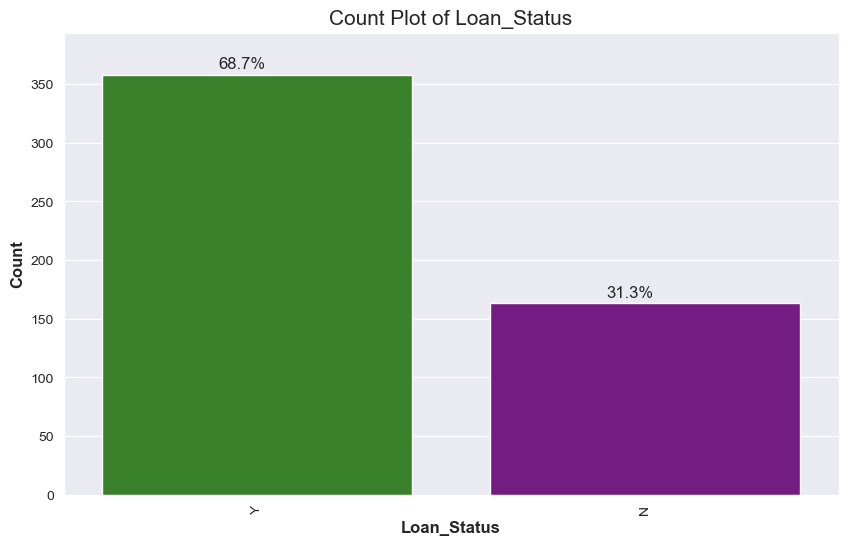

In [13]:
# create count plot of loan status
plot_data(Data,column = "Loan_Status",plot_type = "count")

<span style="font-family: Arial; color: #1f608d; font-size: 36px;">🔍 Insights: Count Plot of Loan Status</span>
    
From Above chart we can observe following points:
 1. Around 68.7% applicant loan application is approved. 31.3% loan applicant loan application is rejected.
 2. This Indicating that there is significance difference between count of rejected and approved application.
 3. This conclude that Data is imbalanced around target variable (Loan Status)

In [14]:
def plot_pie_Chart(data, column, palette=["#2e921b", "#7f1b92"], figsize=(10, 6)):
    '''
    Plots the gender distribution of all applicants in a pie chart.

    Parameters:
    data (pandas.DataFrame): The data containing the gender column.
    column : str
        The column of the data to be plotted
    palette : list of str, default ["#2e921b", "#7f1b92"]
        The color palette to be used for the plot.
    figsize : tuple of int, default (10,6)
        The size of the figure to be created.
    Returns:
    None.
    '''
    # Count the number of occurrences for each column category
    gender_counts = data[column].value_counts()
    
    names = gender_counts.index.tolist()
    color_pie = palette[:len(names)] # Ensure that the color palette has the same length as the number of categories
    
    fig, ax = plt.subplots(figsize= figsize)
    
    ax.pie(gender_counts, labels=names, autopct='%.1f%%', colors= color_pie,
           wedgeprops={'linewidth': 3.0, 'edgecolor': '#FFFFFF'},
           textprops={'size': 'medium', 'color': '#000000', 'weight': 'bold'})
    ax.set_title('Distribution of Gender', fontsize=14)
    plt.tight_layout()
    
    # Add some beautification to the pie chart
    ax.axis('equal')
    ax.legend(frameon=False, loc='best')
    plt.setp(ax.spines.values(), linewidth=2)
    plt.setp(ax.get_xticklabels(), fontsize=12, weight='bold')
    plt.setp(ax.get_yticklabels(), fontsize=12, weight='bold')
    plt.show()

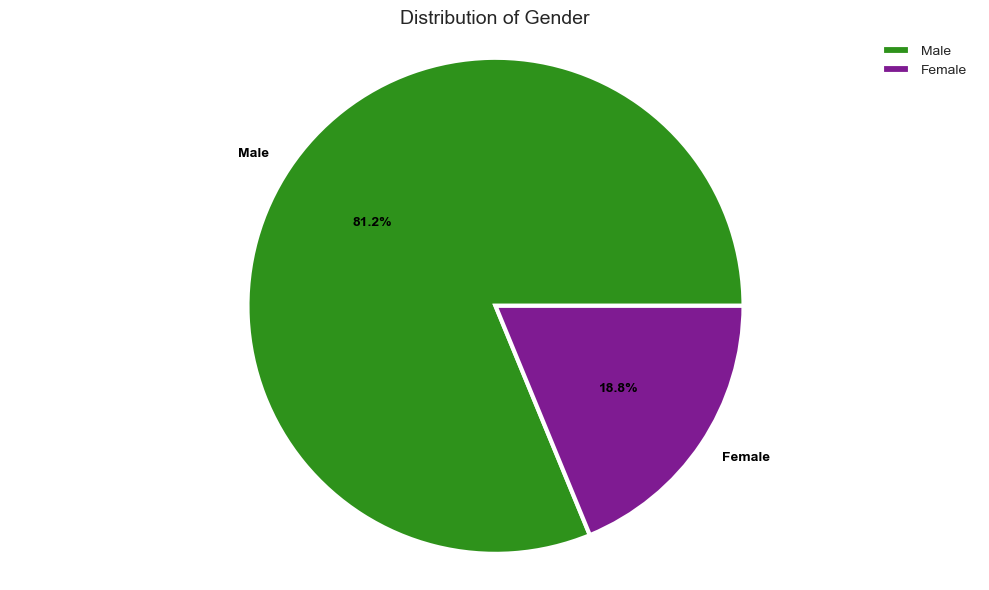

In [15]:
# Gender Distribution
plot_pie_Chart(Data, "Gender", palette=["#2e921b","#7f1b92"], figsize=(10, 6))

<span style="font-family: Arial; color: #1f608d; font-size: 36px;">🔍 Insights: Gender Distribution</span>

From above pie chart following insights we can get :
1. Around 81.2% people are Male Applicants and 18.8% are female Applicants.
2. This conclude that Male are targeted customer for loan products.

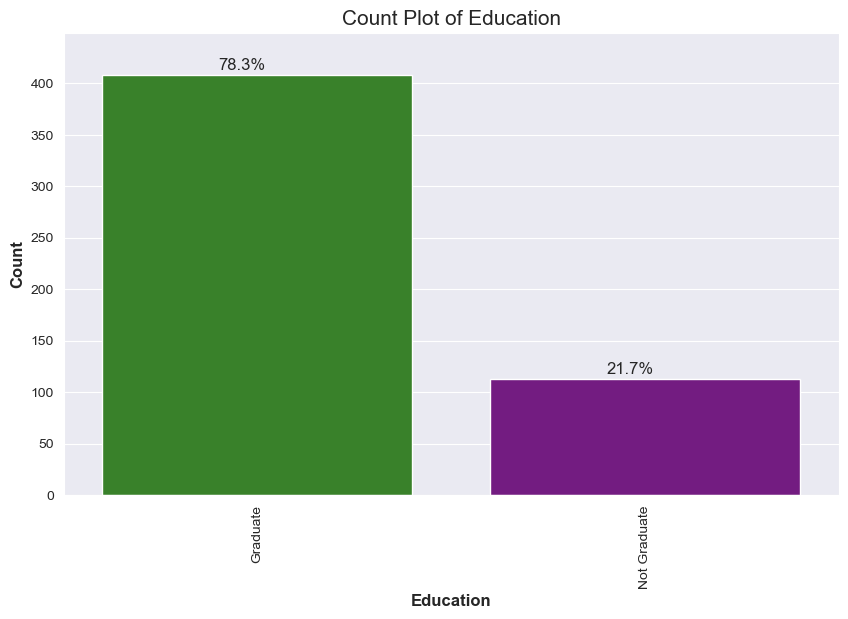

In [16]:
# create count plot of Education
plot_data(Data,column = "Education",plot_type = "count")

<span style="font-family: Arial; color: #1f608d; font-size: 36px;">🔍 Insights: Education counts per category</span>
1. From above count plot we see that majority of applicants are Graduate (78.3%) that means higher number of people who are applying loan are graduate.
2. Only 21.7 % applicants are not Graduate.

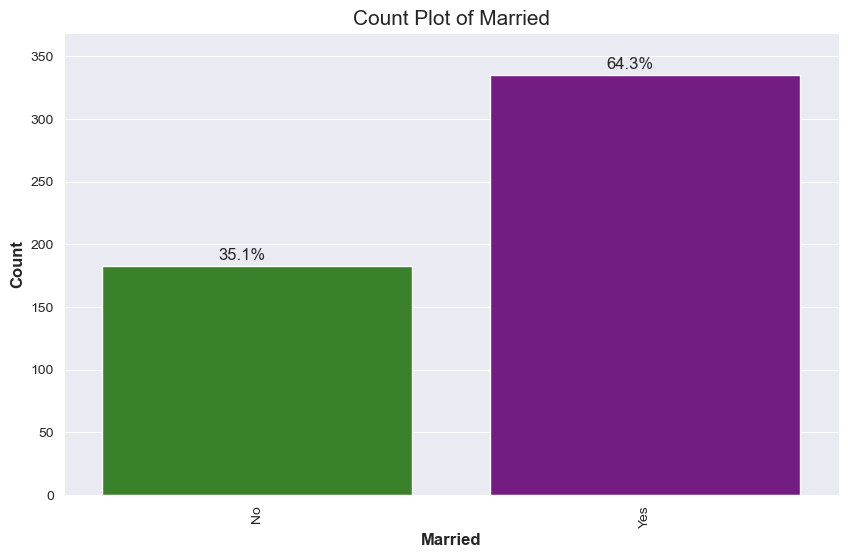

In [17]:
# Create count plot of Marital status
plot_data(Data,column = "Married",plot_type = "count")

<span style="font-family: Arial; color: #1f608d; font-size: 36px;">🔍 Insights: Marital Status Counts</span>
    
1. From above graph we can see that more no of married people are applicants like 64.3% and 35.1 % are not married.
2. this suggest that married people are more likely to apply for loan than non married.

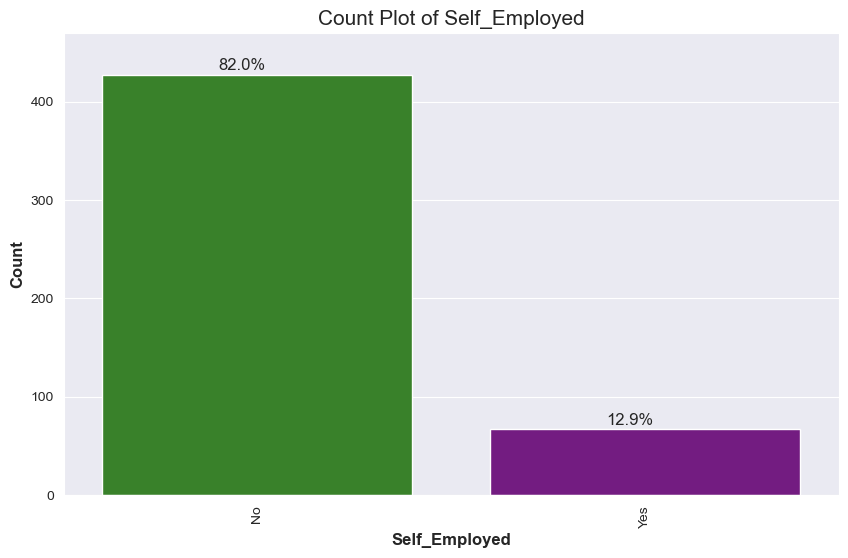

In [18]:
# create count plot of Employment status
plot_data(Data,column = "Self_Employed",plot_type = "count")

<span style="font-family: Arial; color: #1f608d; font-size: 36px;">🔍 Insights: Employment status counts per category</span>

1. Count plot for Self_Employed column shows that around 82% loan applicant are not self-employed.
2. only 12.9% are self employed people.

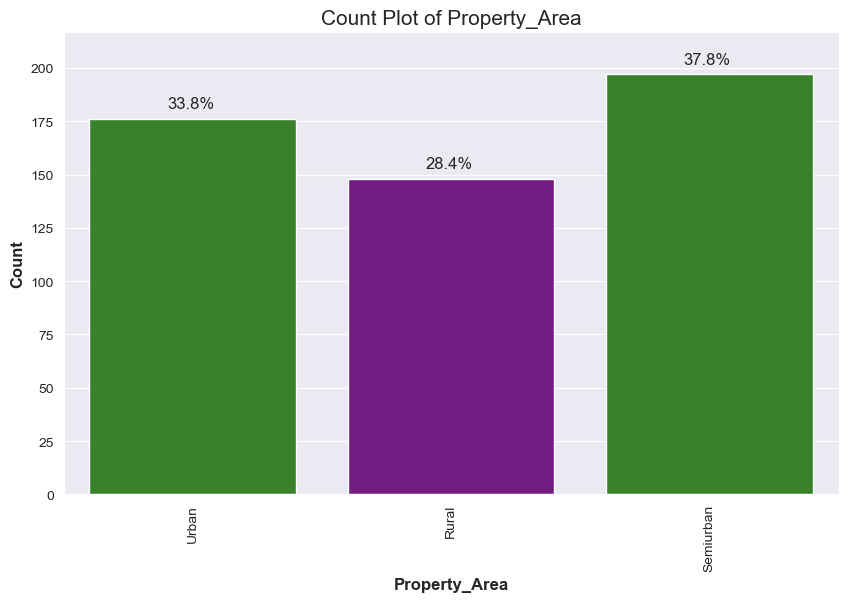

In [19]:
# create count plot of property area
plot_data(Data,column = "Property_Area",plot_type = "count")

<span style="font-family: Arial; color: #1f608d; font-size: 36px;">🔍 Insights: Property Area counts per category</span>

Based on graph following insights we can get:
1. 33.8% are Urban property area.
2. Semi-urban property area counts are high among other category (37.8%)
3. Rural area counts are 28.4% .
4. Differnce between semi-urban and other category is quite significance difference observed.

In [20]:
def swarm_plot(data, column, palette=["#4169e1"], figsize=(14, 10),size = 4):
    """
    Create a swarm plot of the given column of the given data with the specified color palette.

    Parameters:
    -----------
    data : pandas DataFrame
        The data to be plotted
    column : str
        The column of the data to be plotted
    palette : list of str, default ["#4169e1"]
        The color palette to be used for the plot.
    figsize : tuple of int, default (10,6)
        The size of the figure to be created.

    Returns:
    --------
    None
    """
    sns.set_style("darkgrid")
    fig, ax = plt.subplots(figsize=figsize)

    sns.swarmplot(y=column, data=data, ax=ax, palette=palette,size = size)

    ax.set_title(f"Swarm Plot of {column}", size=15)
    ax.set_ylabel(column, size=12, weight="bold")

    plt.show()

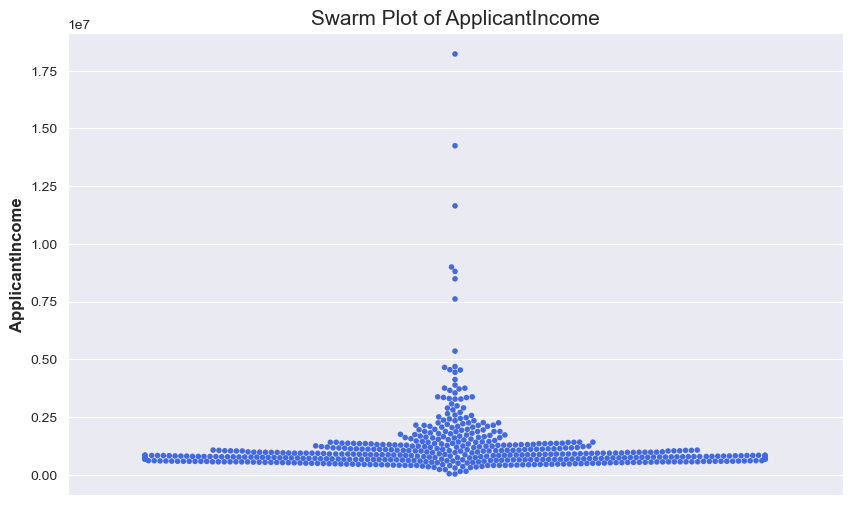

In [21]:
swarm_plot(Data,column = "ApplicantIncome", palette=["#4169e1"], figsize=(10, 6))

<span style="font-family: Arial; color: #1f608d; font-size: 36px;">🔍 Insights: Sworn Plot for Applicant Income</span>

Based on swarm Plot result we get following insights:
1. The Distribution is right-skewed with some extreme outliers. Majority of the applicants have income between 0 to 25000.
2. Very few applicants have income above 80,000 . this can be considered as outliers.
3. overall sworn plot provide good understanding of income distribution among the loan applicants.

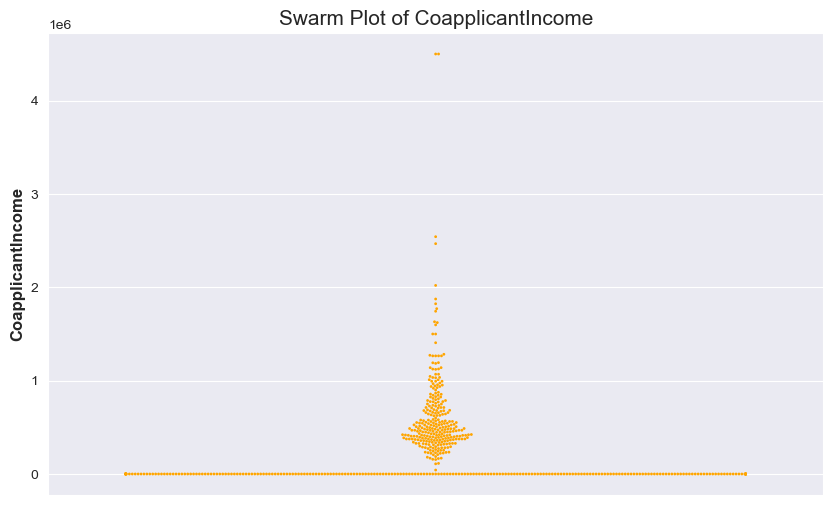

In [22]:
# sworn plot for coapplicant Income
swarm_plot(Data,column = "CoapplicantIncome", palette=["#ffa500"], figsize=(10, 6),size = 2)

<span style="font-family: Arial; color: #1f608d; font-size: 36px;">🔍 Insights: Sworn Plot for CoApplicant Income</span>

Based on sworn plot for CoApplicant Income, here is some insight we get from this graph :

1. Majority of applicants do not have a co-applicant or the low co-applicant income.
2. there are few applicants who have a high co-applicant income.
3. This distribution is heavily right-skewed with a few outliers on the right side.

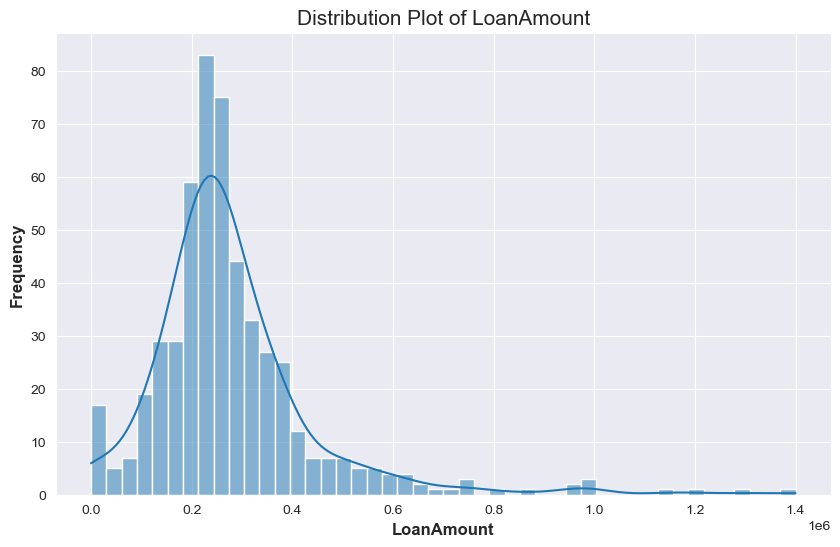

In [23]:
# Histogram plot for Loan Amount
plot_data(Data,column = "LoanAmount",plot_type = "hist")

<span style="font-family: Arial; color: #1f608d; font-size: 36px;">🔍 Insights: Distribution(Histogram) Plot for Loan Amount</span>

Based on the Distribution plot, following observation we can get :

1. Distribution is right skewed, which means that the majority of the loan amounts are towards the lower end of the scale.
2. The plots shows some extreme values, indicating that some individuals have taken out very large amount as loan.
3. The plot also shows a peak around 0.2-0.4X 10^6 , indicating that a significant number of individuals have taken loan in that range.
4. Plot also show loan tails towards the higher end of scale. indicating that while most loans are small, there are some loans that are much larger than the average.

<span style="font-family: Arial; color: #1f608d; font-size: 36px;">🔍📉 Outlier Detection:</span>

Outliers are observations that deviate significantly from other observations in a dataset. Outliers can occur due to measurement errors, data entry errors, or due to the presence of unusual or extreme values in the data. Outliers can have a significant impact on the statistical analysis and can distort the results. Therefore, it is important to detect and handle outliers in the data.

Outlier detection is the process of identifying observations in a dataset that are significantly different from the other observations. There are various techniques for detecting outliers, including visualization techniques such as box plots and Distribution plot. As well as statistical techniques such as Z-score, interquartile range (IQR), and Mahalanobis distance

In [24]:
def plot_hist_box(data, column):
    """
    This function takes in a pandas DataFrame and a column name and plots a histogram and a box plot of the column.
    The histogram shows the distribution of the column, while the box plot displays the outliers.
    
    Parameters:
    data (pandas.DataFrame): The dataset to be plotted
    column (str): The name of the column to be plotted
    
    Returns:
    None
    """
    
    # Set the figure size and style
    sns.set(style="whitegrid")

    # Create the subplots
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 4))

    # Plot the histogram
    sns.histplot(data=data, x=column, bins=20, kde=True, ax=ax1, color="#2c921b")
    ax1.set_title(f"Histogram of {column}", size=15, weight='bold')
    ax1.set_xlabel(column, size=12, weight='bold')
    ax1.set_ylabel("Frequency", size=12, weight='bold')

    # Plot the box plot
    sns.boxplot(data=data, x=column, ax=ax2, color="#921b8b")
    ax2.set_title(f"Box Plot of {column}", size=15, weight='bold')
    ax2.set_xlabel(column, size=12, weight='bold')
    ax2.set_ylabel("Value", size=12, weight='bold')

    # Adjust the spacing between the subplots
    plt.subplots_adjust(wspace=0.3)

    # Show the plot
    plt.show()

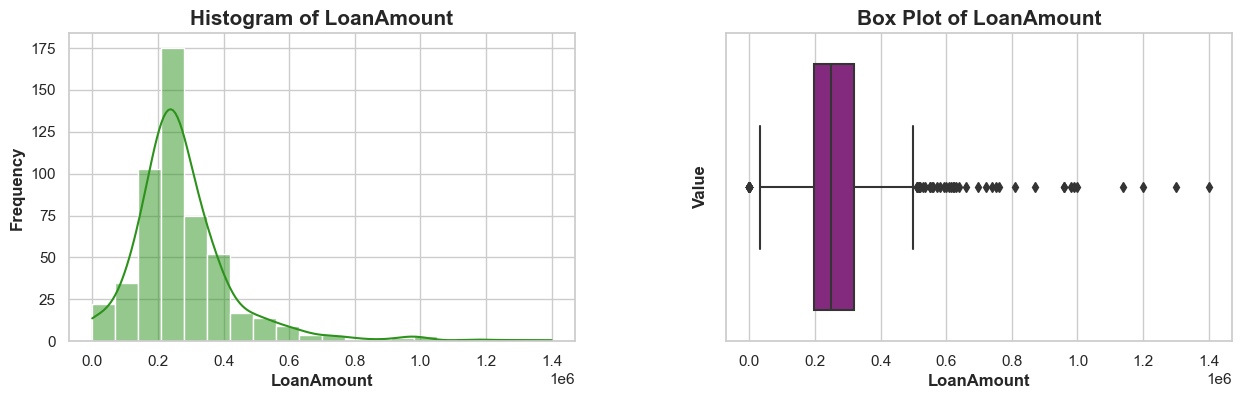

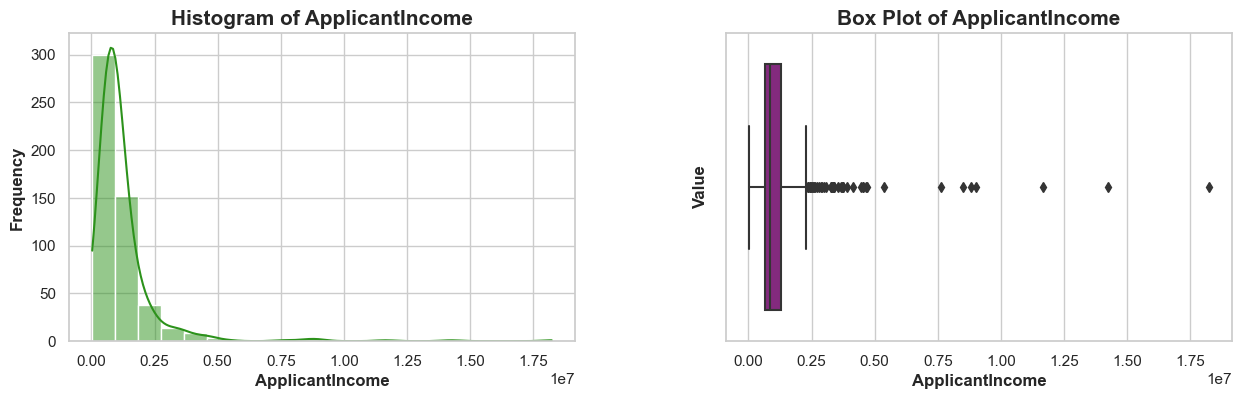

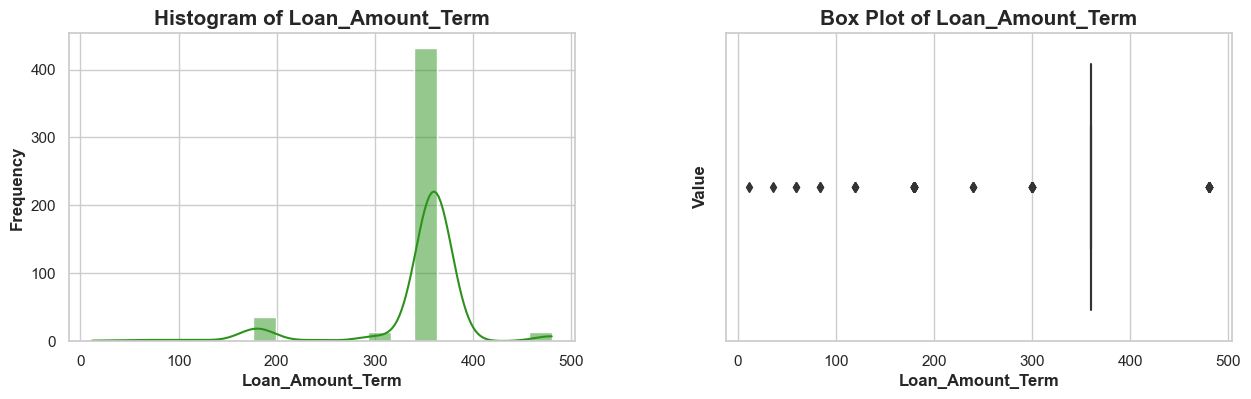

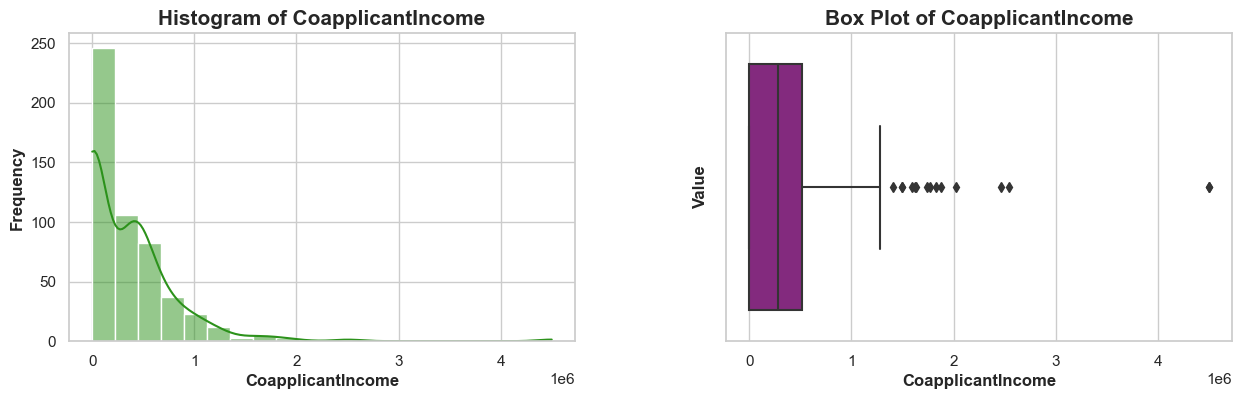

In [25]:
#Creating a list including the columns have outliers
col_outliers = ["LoanAmount","ApplicantIncome","Loan_Amount_Term","CoapplicantIncome"]

#Showing all the columns in one action 
for col in col_outliers:
    plot_hist_box(Data, col)

<span style="font-family: Arial; color: #1f608d; font-size: 36px;">🔍 Insights: Outlier Detection for Credit History</span>

From above box plot and distribution plot we get following insights.

1. LoanAmount : In Loan Amount there are few outliers present in extreme high side. distribution is right skewed.
2. ApplicantIncome : In Applicant Income Amount there are few outliers present in extreme high side. distribution is right skewed.
3. CoapplicantIncome : In coappliannt Amount there are few outliers present in extreme high side. distribution is right skewed.

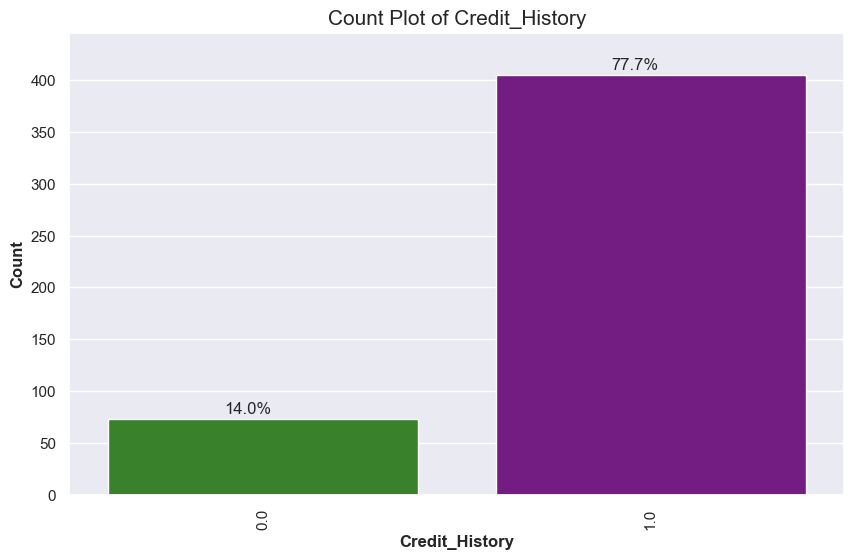

In [26]:
# Count Plot for Credit History
plot_data(Data,column = "Credit_History",plot_type = "count")

<span style="font-family: Arial; color: #1f608d; font-size: 36px;">🔍 Insights: Count Plot for Credit History</span>

From Credit History Count plot we get following insights :

1. Most of applicants have a credit history, as the value "1.0" has significantly higher count than the  value "0.0".
2. Applicant with No credit history number is lower than Applicant with credit history number.
3. The Number of applicants with no credit history is still quite high as number like 100 of applicants not having credit history.
4. It is possible that the presence or absence of a credit history may have an impact on loan approval, and therefore, this column may be important in the loan approval prediction model.

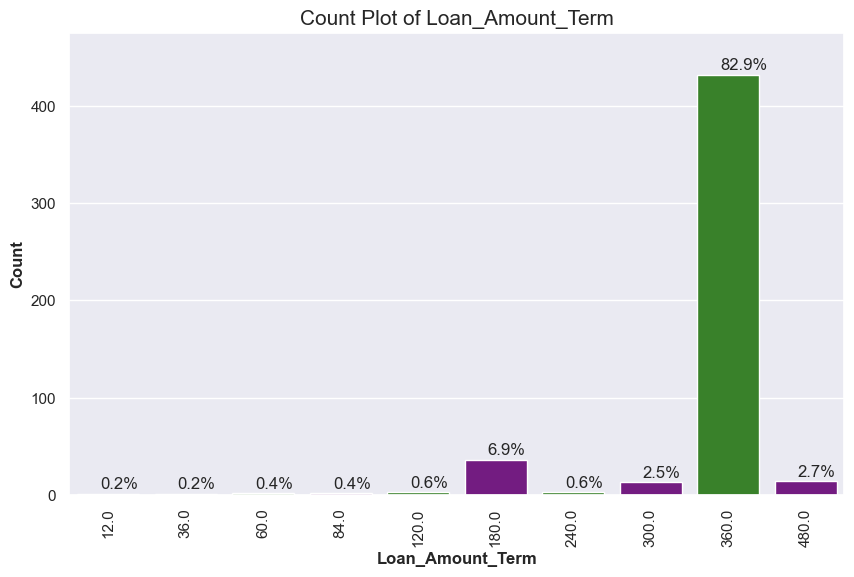

In [27]:
# Count Plot for Loan Amount Term
plot_data(Data,column = "Loan_Amount_Term",plot_type = "count")

<span style="font-family: Arial; color: #1f608d; font-size: 36px;">🔍 Insights: Count Plot for Loan Amount Term</span>

From count plot for Loan Amount Term , we can get following insights:
Assuming Loan Amount term value is in Month.

1. The Most common loan term is 360 months, contributing aroung 82.9% loan application.
2. There next most common loan term is 180 months, 480 months and 300 months.
3. There are few instance of loan amont term less than 180 months and also 0.6% applicants have loan amount term 240 months.
4. very few instance of loan amount term is 12 , 36, 60 , 84 months.
5. We can conclude that the most borrowers prefer a loan amount term as 360 months.

<span style="font-family: Arial; color: #1f608d; font-size: 36px;">📊🔍 Univariate Analysis Conclusion:</span>

1. Loan Amount : The Distribution plot showed that Loan Amount column has few extreme values, indicating the presence of outliers.

2. CoapplicantIncome: The swarm plot of CoapplicantIncome showed the presence of outliers in this column. However it should be noted that few values in this column were 0. which might be due to the applicant having no co-applicant.

3. Loan_Amount_Term:Loan_Amount_Term had shown that this column has 14 missing values.

4. Credit_History: credit_History column has 43 missing values. Additionally, the count plot revealed that most applicants in the dataset have a credit history.

<span style="font-family: Arial; color: #1f608d; font-size: 36px;">Bivariate Analysis 🔍</span>

Bivariate analysis is the statistical analysis that involves the examination of the relationship between two variables. The analysis focuses on understanding the strength, direction, and significance of the relationship between the two variables.

The analysis can be performed on both numerical and categorical variables. For numerical variables, common techniques include correlation analysis, scatter plots, and regression analysis. On the other hand, for categorical variables, common techniques include chi-square analysis, contingency tables, and association rules analysis.

The main objective of bivariate analysis is to identify any patterns, trends, or relationships between the two variables that may be helpful in making informed decisions. The results of the analysis can be used to develop predictive models, make business decisions, or formulate hypotheses for further research.

<span style="font-family: Arial; color: #1f608d; font-size: 36px;">📊 Grouped Table Frequency 📈</span>

A grouped table frequency is a type of statistical table that displays the frequency distribution of a categorical variable. It organizes the data into groups or categories and counts the number of occurrences or frequency of each category.

In [28]:
def calculate_grouped_freq(data, group_cols, count_col):
    """
    Returns a grouped frequency table for the specified columns in the input dataframe.

    Parameters:
    -----------
    data : pandas.DataFrame
        The input dataframe.
    group_cols : list
        A list of column names to group the data by.
    count_col : str
        The column name to count the frequency of.

    Returns:
    --------
    pandas.DataFrame
        A grouped frequency table showing the count of values in the specified count column 
        for each unique combination of values in the specified group columns.
    """
    freq_table = pd.DataFrame(data.groupby(group_cols)[count_col].count())
    freq_table.reset_index(inplace=True)
    freq_table.columns = [col.title() for col in freq_table.columns]
    freq_table_pivot = freq_table.pivot(index=group_cols[0], columns=group_cols[1], values=count_col)
    freq_table_pivot.reset_index(inplace=True)
    freq_table_pivot.columns.name = None 
    return freq_table_pivot

In [29]:
# Grouping Gender and Married Feature 
Gender_Married_Freq = calculate_grouped_freq(data=Data, group_cols=['Gender', 'Married'], count_col='Loan_Status')
Gender_Married_Freq

,Gender,No,Yes
0,Female,70,25
1,Male,112,301


In [30]:
# Grouping Gender and Education Feature 
Gender_Educated_Freq = calculate_grouped_freq(data=Data, group_cols=['Gender', 'Education'], count_col='Loan_Status')
Gender_Educated_Freq

,Gender,Graduate,Not Graduate
0,Female,79,17
1,Male,320,95


In [31]:
# Grouping Gender and Self Employed Feature 
Gender_Self_Employed_Freq = calculate_grouped_freq(data = Data, group_cols = ['Gender', 'Self_Employed'], count_col = "Loan_Status")
Gender_Self_Employed_Freq

,Gender,No,Yes
0,Female,78,12
1,Male,342,52


In [32]:
def plot_loan_by_column(data, column, figsize=(10,6), colors=['#921b8b', '#2c921b']):
    """
    Plot loan approval based on a categorical column in the dataframe.
    
    Parameters:
    -----------
    data: pandas DataFrame
        The dataframe containing the data to plot.
    column: str
        The column to group the data by and plot.
    figsize: tuple, optional
        The size of the figure to create. Default is (10,6).
    colors: list, optional
        The list of colors to use for the plot. Default is ['#921b8b', '#2c921b'].
    """
    grouped_data = data.groupby([column, 'Loan_Status']).size().unstack()
    grouped_data.plot(kind='bar', stacked=True, color=colors, figsize=figsize)
    plt.title(f'Loan Approval based on {column}', fontsize=15, fontweight='bold', color='black')
    plt.xlabel(column, fontsize=12, fontweight='bold', color='black')
    plt.ylabel('Count', fontsize=12, fontweight='bold', color='black')
    plt.show()

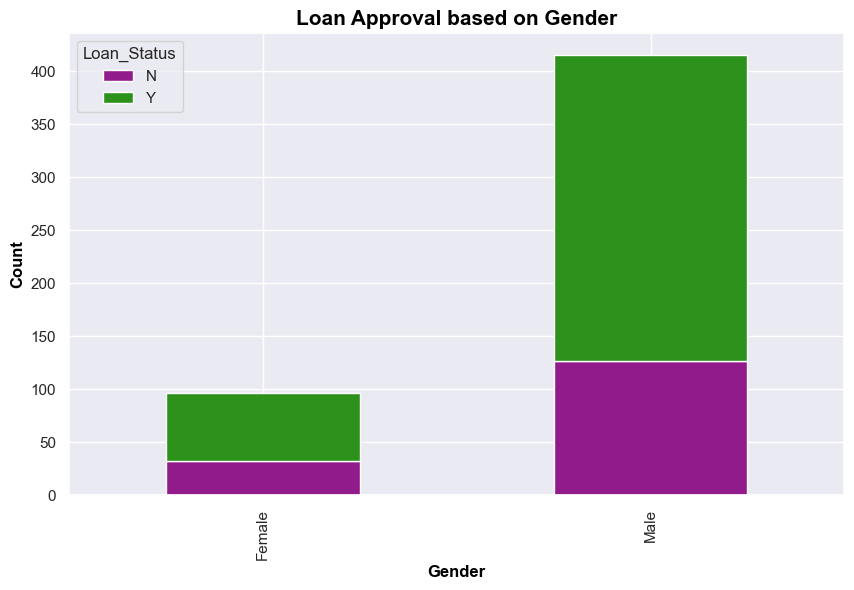

In [33]:
# Loan Approval based on Gender
plot_loan_by_column(Data, 'Gender')

<span style="font-family: Arial; color: #1f608d; font-size: 36px;">🔍 Insights: Stacked Bar chart for Loan Approval by Gender</span>

Following Insight we get based on this chart :
1. The Plot Indicates that the number of male applicants are higher than female applicants, 
2. Majority of male applicants were approved for loans, while a slightly lower percentage of female applicants were approved.

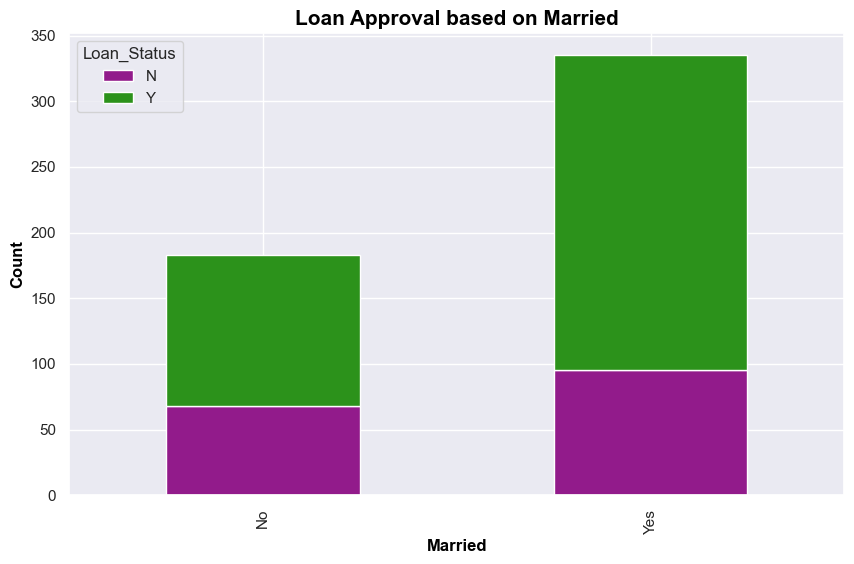

In [34]:
# Loan Approval based on Gender
plot_loan_by_column(Data, 'Married')

<span style="font-family: Arial; color: #1f608d; font-size: 36px;">🔍 Insights: Stacked Bar chart for Loan Approval by Marital Status</span>

Following are insights based on above graph :

1. Higher Married people are in category of approved loan applicant.
2. Additionally, the count of rejected loans is also higher for the 'No' category of the 'Married' column. than unmarried people

In [35]:
def plot_loan_property(column, data, palette):
    """
    Creates a bar chart of loan status counts by property area using seaborn.

    Args:
    column (str): The name of the column to plot on the x-axis.
    data (DataFrame): The input data containing loan status and property area columns.
    palette (list): The list of color codes to use for the bar chart.

    Returns:
    None.
    """
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data, x=column, hue="Loan_Status", palette=palette)
    plt.title(f"Loan Status by {column}", fontsize=15, fontweight='bold')
    plt.xlabel(column, fontsize=12, fontweight='bold')
    plt.ylabel('Count', fontsize=12, fontweight='bold')
    plt.show()

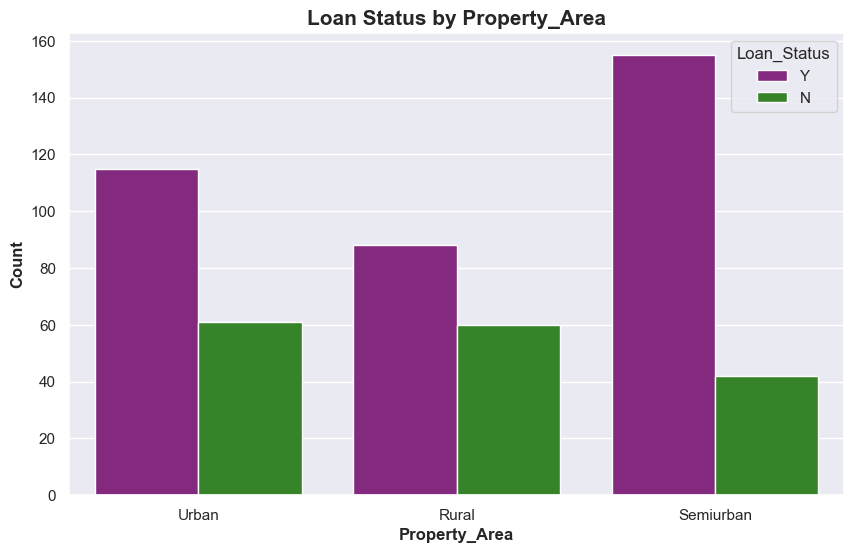

In [36]:
# Loan status per property area
plot_loan_property(data = Data, column = "Property_Area", palette = ['#921b8b', '#2c921b'])

<span style="font-family: Arial; color: #1f608d; font-size: 36px;">🔍 Insights: Side by Side Bar chart for Loan Approval by Property Area</span>

Based on the this chart, we can get following insights :

1. We can see that highest number of approved loans are in semi urban area followed by urban area and rural area have least number of approved loans.

2. Rural and Urban area have almost same number of not approved loan application. semi urban area has least number of rejected loan application.

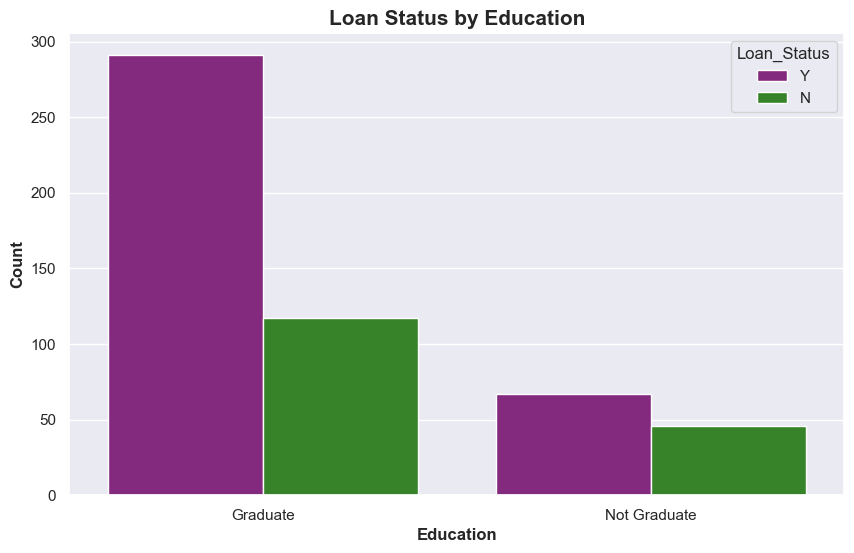

In [37]:
# Loan status by Education
plot_loan_property(data = Data, column = "Education", palette = ['#921b8b', '#2c921b'])

<span style="font-family: Arial; color: #1f608d; font-size: 36px;">🔍 Insights: Side by Side Bar chart for Loan Approval by Education Status</span>

Based on the this chart, we can get following insights :

1. Above Plot reveals that applicants with a Graduate Degree are more likely to get their loan approved compared to not graduate applicant.
2. Count of approved loans are higher for graduate people.
3.  This could be an indication that level of education may play a role in determining the loan eligibility.

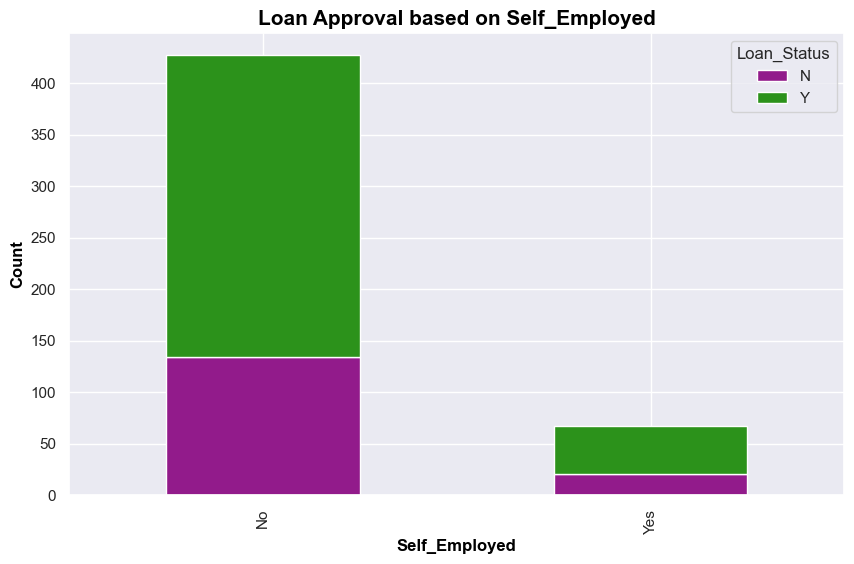

In [38]:
# Loan Approval based on Gender
plot_loan_by_column(Data, 'Self_Employed')

<span style="font-family: Arial; color: #1f608d; font-size: 36px;">🔍 Insights:Stacked Bar chart for Loan Approval by Employment Status</span>

Based on the this chart, we can get following insights :

1. Applicant who are not self employed have higher chance for getting loan compared to self employed people.
2. The plot provides an insight into the impact of the Self-Employment status on the Loan Approval, where applicants who are not self-employed are more likely to have their loans approved.

<span style="font-family: Arial; color: #1f608d; font-size: 36px;">🎻📊 Violin Plot</span>

Violin Plot is a method to visualize the distribution of numerical data of different variables. It is similar to Box Plot but with a rotated plot on each side, giving more information about the density estimate on the y-axis. 

In [39]:
def violin_plot(data, column, palette=["#4169e1", "#2c921b"], figsize=(10, 8)):
    """
    Creates a violin plot of loan status counts by applicant income using seaborn.

    Args:
    data (DataFrame): The input data containing loan status and applicant income columns.
    column (str): The name of the column to plot on the y-axis.
    palette (list): The list of color codes to use for the violin plot.
    figsize (tuple): The size of the figure to be plotted.

    Returns:
    None.
    """
    plt.figure(figsize=figsize)
    sns.violinplot(data=data, x="Loan_Status", y=column, hue="Loan_Status", palette=palette)
    plt.title(f"{column} vs Loan Status", fontsize=15, fontweight='bold')
    plt.xlabel('Loan Status', fontsize=12, fontweight='bold')
    plt.ylabel(column, fontsize=12, fontweight='bold')
    plt.legend(title='Loan Status', fontsize=12, title_fontsize=12)
    sns.despine()
    plt.show()

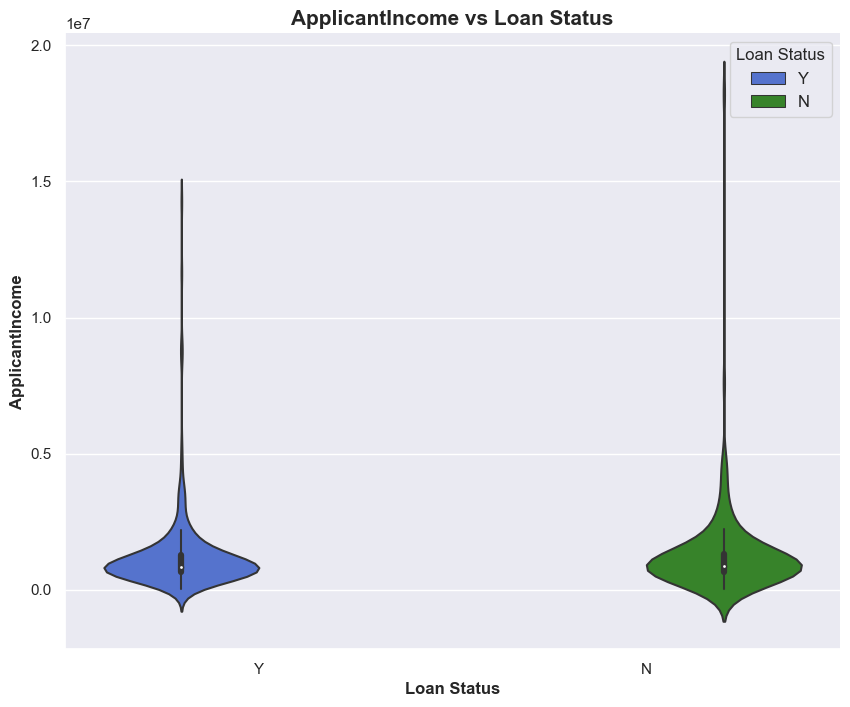

In [40]:
# violin Plot for Applicant Income vs Loan Status
violin_plot(data = Data, column = "ApplicantIncome")

<span style="font-family: Arial; color: #1f608d; font-size: 36px;">🔍 Insights:Violin chart for ApplicantIncome Vs Loan Approval</span>

Based on the this chart, we can get following insights :

In [41]:
def box_plot(data, column_x, column_y, palette=["#4169e1", "#2c921b"], figsize=(10, 6)):
    """
    Creates a box plot for a given dataset, with one categorical variable on the x-axis and one numerical variable on the y-axis.
    Parameters:
    data (DataFrame): The dataset to be visualized.
    column_x (str): The column name of the categorical variable to be plotted on the x-axis.
    column_y (str): The column name of the numerical variable to be plotted on the y-axis.
    palette (list, optional): A list of colors to be used for the plot. Defaults to ["#4169e1", "#2c921b"].
    figsize (tuple, optional): A tuple specifying the size of the plot. Defaults to (10, 6).

    Returns:
    None
    """
    plt.figure(figsize=figsize)
    sns.boxplot(data=data, x=column_x, y=column_y, palette=palette)
    plt.title(f"{column_y} vs {column_x}", fontsize=15, fontweight='bold')
    plt.xlabel(column_x, fontsize=12, fontweight='bold')
    plt.ylabel(column_y, fontsize=12, fontweight='bold')
    # Set x and y limits
    plt.ylim(0, data[column_y].max() * 1.1)
    plt.xlim(-0.5, 1.5)
    plt.show()

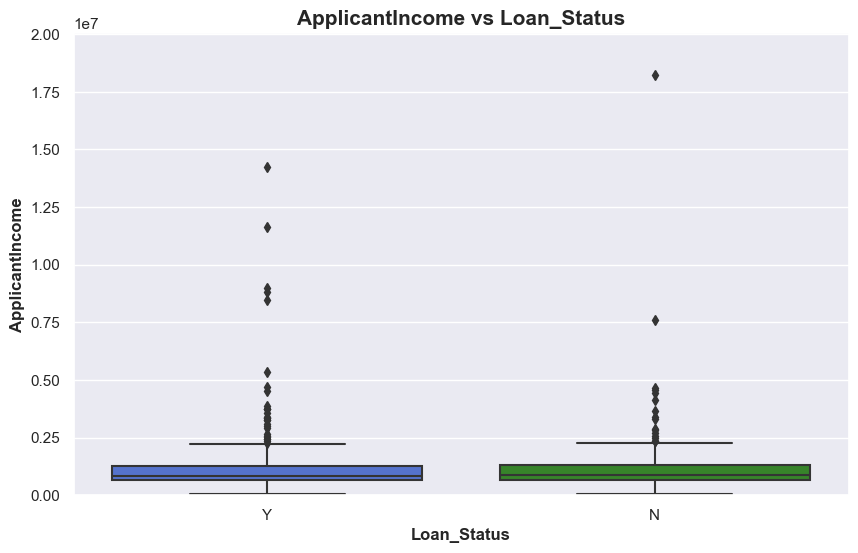

In [42]:
# Box Plot for Applicant Income vs Loan Status
box_plot(data = Data, column_x = "Loan_Status", column_y = "ApplicantIncome", palette=["#4169e1", "#2c921b"], figsize=(10, 6))

<span style="font-family: Arial; color: #1f608d; font-size: 36px;">🔍 Insights:Box Plot for ApplicantIncome Vs Loan Approval</span>

1. This Graph show that there are some outliers are present in both category and outlier removal needs to be done in data pre processing.

<span style="font-family: Arial; color: #1f608d; font-size: 36px;">🧪📊 Hypothesis Testing for Data Analysis 📈🧪</span>

Hypothesis testing is a statistical method used to determine whether a hypothesis is true or false. It involves making an assumption about a population parameter, such as the mean or variance, and then collecting data to test that assumption. The goal of hypothesis testing is to determine whether the data provides enough evidence to reject or fail to reject the null hypothesis.

Hypothesis testing typically involves calculating a test statistic, such as a t-test or a chi-squared test, and comparing it to a critical value. If the test statistic is greater than the critical value, then there is enough evidence to reject the null hypothesis and accept the alternative hypothesis. If the test statistic is less than the critical value, then there is not enough evidence to reject the null hypothesis.

Hypothesis testing is an important tool for data analysis because it allows us to make informed decisions based on the available data. By testing hypotheses and making conclusions based on statistical evidence, we can ensure that our decisions are based on sound reasoning and not just intuition or guesswork.

<div class="alert alert-block alert-info">
    <h3>Statistical Question #1:</h3>
    <p>🤔 Does the applicant's gender have an impact on loan approval rates?</p>
</div>

<div class="alert alert-block alert-info"> 
    <p><b>Null Hypothesis:</b> 🤷‍♂️ The applicant's gender does not have a significant impact on loan approval rates.</p>
    <p><b>Alternative Hypothesis:</b> 🤔 The applicant's gender has a significant impact on loan approval rates.</p>
</div>

<div class="alert alert-block alert-info"> 
    <p>The significance level as α=0.05. If the resulting p-value is less than or equal to 0.05, we reject the null hypothesis and conclude that gender has a significant impact on loan approval rates.<p>
</div>

<div class="alert alert-block alert-info"> 
    <p>A suitable hypothesis test for this scenario could be the chi-squared test of independence. This test can determine whether there is a statistically significant association between two categorical variables.<p>
</div>

In [43]:
def column_loan_approval_impact(data, column):
    '''
    Perform a chi-square test to determine if the applicant's gender has an impact on loan approval rates.

    Args:
    - data: a pandas DataFrame containing columns for 'Gender' and 'Loan_Status'
    - column : Column name
    Returns:
    - p_val: the p-value of the chi-square test
    - hypothesis: a string indicating whether to reject or fail to reject the null hypothesis
    '''

    # Create contingency table
    contingency_table = pd.crosstab(data[column], data["Loan_Status"])

    # Perform chi-square test
    chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

    # Evaluate results
    if p_val <= 0.05:
        hypothesis = 'We reject the null hypothesis.'
    else:
        hypothesis = 'We fail to reject the null hypothesis.'

    return p_val, hypothesis

In [44]:
# evaluting stattical question
p_val, hypothesis = column_loan_approval_impact(Data, "Gender")

print("P value for this statatical question is "+ str(p_val))
print(hypothesis)

P value for this statatical question is 0.6902367665572007
We fail to reject the null hypothesis.


<span style="font-family: Arial; color: #1f608d; font-size: 36px;">📊🔍 Statatical Question -1  Analysis Conclusion:</span>

We obtained a p-value of 0.69 which is greater than the significance level of 0.05. Therefore , we fail to reject the null hypothesis that the applicant's gender does not have a significant impact on loan approval rates.This means that we do not have sufficient evidence to conclude that gender has a significant impact on loan approval rates.

<div class="alert alert-block alert-info"> 
    <font size ="3">
    <b>Statistical Question #2:</b>
    </font> 
    <p>🤔 Is there a significant difference in loan approval rates between married and unmarried individuals?<p>
</div>

<div class="alert alert-block alert-info"> 
    <p><b>Null Hypothesis:</b> 🤷‍♂️ There is no significant difference in loan approval rates between married and unmarried individuals.
<b>Alternative Hypothesis:</b> 🤔 There is a significant difference in loan approval rates between married and unmarried individuals.<p>

</div>

<div class="alert alert-block alert-info"> 
    <p>The significance level is 0.05. This means that we are willing to accept a 5% chance of making a Type I error, which is rejecting the null hypothesis when it is actually true.

If the p-value obtained from the hypothesis test is less than the significance level (i.e., p-value < alpha), then we reject the null hypothesis and conclude that there is evidence of a significant difference in loan approval rates between married and unmarried individuals. On the other hand, if the p-value is greater than or equal to the significance level (i.e., p-value >= alpha), then we fail to reject the null hypothesis and conclude that there is insufficient evidence to support a significant difference in loan approval rates between married and unmarried individuals.<p>
</div>

<div class="alert alert-block alert-info"> 
    <p>The appropriate hypothesis test for this scenario is a chi-squared test of independence, which can determine whether there is a statistically significant association between two categorical variables (marital status and loan approval status).<p>
</div>

In [45]:
# evaluting second statatical question
p_val, hypothesis = column_loan_approval_impact(data = Data , column = "Married")

print("P value for this statatical question is "+ str(p_val))
print(hypothesis)

P value for this statatical question is 0.04969152864604629
We reject the null hypothesis.


<span style="font-family: Arial; color: #1f608d; font-size: 36px;">📊🔍 Statatical Question - 2  Analysis Conclusion:</span>

Based on the given hypothesis test with a significance level of 0.05, we obtained a p-value of 0.04 which lower than significance level so we will reject this hypothesis. there is enough evidence to suggest that there is a significant difference in loan approval rates between married and unmarried individuals.

<div class="alert alert-block alert-info"> 
    <font size ="3">
    <b>Statistical Question #3:</b>
    </font> 
    <p>🤔 Does the applicant's education level have an impact on loan approval rates?<p>
</div>

<div class="alert alert-block alert-info"> 
    <p><b>Null Hypothesis:</b> 🤷‍♂️ There is no significant impact in loan approval rates based on applicant  education status</p>
<b>Alternative Hypothesis:</b> 🤔 There is significant impact in loan approval rates based on applicant  education status<p>
</div>

<div class="alert alert-block alert-info"> 
    <p>The significance level for this hypothesis test is 0.05. If the calculated p-value is less than the significance level (i.e., p-value < 0.05), we can reject the null hypothesis and conclude that there is evidence to support the alternative hypothesis that the applicant's education level has a significant impact on loan approval rates.<p>
</div>

<div class="alert alert-block alert-info"> 
    <p>A chi-squared test would be appropriate for testing the relationship between the applicant's education level and loan approval rates.<p>
</div>

In [46]:
def feature_status_loan_approval_impact(data,feature):
    '''
    Perform a chi-square test to determine if there is a significant difference in loan approval rates between married and unmarried individuals.

    Args:
    - data: a pandas DataFrame containing columns for 'Married' and 'Loan_Status'

    Returns:
    - p_val: the p-value of the chi-square test
    - hypothesis: a string indicating whether to reject or fail to reject the null hypothesis
    '''

    # Create contingency table
    contingency_table = pd.crosstab(data['Loan_Status'], data[feature])

    # Perform chi-square test
    chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

    # Evaluate results
    if p_val <= 0.05:
        hypothesis = 'We reject the null hypothesis.'
    else:
        hypothesis = 'We fail to reject the null hypothesis.'

    return chi2_stat, p_val, dof, expected, hypothesis

In [47]:
# evaluting second statatical question
chi2_stat, p_val, dof, expected, hypothesis = feature_status_loan_approval_impact(data = Data, feature = "Education")

print("chi squre value is  "+ str(chi2_stat))
print("P value for this statatical question is "+ str(p_val))
print("Degrees of Freedom is: " + str(dof))
print("Expected frequencies: \n" + str(expected))
print(hypothesis)

chi squre value is  5.412089360791851
P value for this statatical question is 0.019997766888094164
Degrees of Freedom is: 1
Expected frequencies: 
[[127.64683301  35.35316699]
 [280.35316699  77.64683301]]
We reject the null hypothesis.


<span style="font-family: Arial; color: #1f608d; font-size: 36px;">📊🔍 Statatical Question -3  Analysis Conclusion:</span>

We have a chi-squared statistic of 5.412 and a p-value of 0.019. Since our significance level was set at 0.05, we reject the null hypothesis. This means that we  have sufficient evidence to conclude that the applicant's education level has a significant impact on loan approval rates.

<div class="alert alert-block alert-info"> 
    <font size ="3">
    <b>Statistical Question #4:</b>
    </font> 
    <p>🤔 Is there a significant difference in loan approval rates between self-employed and salaried individuals?<p>
</div>

<div class="alert alert-block alert-info"> 
    <p>The significance level for this hypothesis test is 0.05. If the calculated p-value is less than the significance level (i.e., p-value < 0.05), we can reject the null hypothesis and conclude that there is evidence to support the alternative hypothesis that there is a significant difference in loan approval rates between self-employed and salaried individuals<p>
</div>

In [48]:
# evaluting second statatical question
chi2_stat, p_val, dof, expected, hypothesis = feature_status_loan_approval_impact(data = Data, feature = "Self_Employed")

print("chi squre value is  "+ str(chi2_stat))
print("P value for this statatical question is "+ str(p_val))
print("Degrees of Freedom is: " + str(dof))
print("Expected frequencies: \n" + str(expected))
print(hypothesis)

chi squre value is  0.0
P value for this statatical question is 1.0
Degrees of Freedom is: 1
Expected frequencies: 
[[133.97773279  21.02226721]
 [293.02226721  45.97773279]]
We fail to reject the null hypothesis.


<span style="font-family: Arial; color: #1f608d; font-size: 36px;">📊🔍 Statatical Question -4  Analysis Conclusion:</span>

Based on the result of the chi-squered test, we can conclude that there is no significant difference in loan approval rates between self-employed and salaried individuals. chi square value is 0.0 and P value is 1.0 which significance higher than significance level of 0.05 therefore we fail to reject null hypothesis.

<div class="alert alert-block alert-info"> 
    <font size ="3">
    <b>Statistical Question #5:</b>
    </font> 
    <p>🤔 Does the loan amount have a significant impact on loan approval?<p>
</div>

<div class="alert alert-block alert-info"> 
    <p><b>Null Hypothesis:</b> 🤷‍♂️ The loan amount does not have a significant impact on loan approval.</p>
<b>Alternative Hypothesis:</b> 🤔 TThe loan amount has a significant impact on loan approval.<p>
</div>

<div class="alert alert-block alert-info"> 
    <p>The significance level is 0.05, which means that we have a 5% chance of rejecting the null hypothesis even if it is true. If the p-value is less than 0.05, we reject the null hypothesis and conclude that there is a significant impact of loan amount on loan approval. If the p-value is greater than 0.05, we fail to reject the null hypothesis and conclude that there is no significant impact of loan amount on loan approval.<p>
</div>

<div class="alert alert-block alert-info"> 
    <p>A suitable hypothesis test for this scenario would be a logistic regression analysis. Logistic regression is a statistical method used to analyze the relationship between a binary dependent variable, such as loan approval (yes/no), and one or more independent variables, such as loan amount. In this case, the logistic regression analysis can help determine whether there is a significant association between loan approval and loan amount, after controlling for other factors that may affect loan approval. The output of the logistic regression model provides a coefficient for the loan amount variable, along with its significance level (p-value).<p>
</div>

In [49]:
# create binary outcome variable
data_loan = Data.copy()
data_loan['loan_approved'] = data_loan['Loan_Status'].map({'Y': 1, 'N': 0})


# define X and Y
X = data_loan[['LoanAmount']]
y = data_loan['loan_approved']

# fit logistic regression model
X = sm.add_constant(X) # add intercept term
model = sm.Logit(y, X).fit()

Optimization terminated successfully.
         Current function value: 0.620365
         Iterations 5


In [50]:
# print model summary
print(model.summary())

                           Logit Regression Results                           
Dep. Variable:          loan_approved   No. Observations:                  521
Model:                          Logit   Df Residuals:                      519
Method:                           MLE   Df Model:                            1
Date:                Sat, 11 Mar 2023   Pseudo R-squ.:                0.001617
Time:                        22:53:29   Log-Likelihood:                -323.21
converged:                       True   LL-Null:                       -323.73
Covariance Type:            nonrobust   LLR p-value:                    0.3062
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9428      0.180      5.251      0.000       0.591       1.295
LoanAmount -5.523e-07   5.35e-07     -1.031      0.302    -1.6e-06    4.97e-07


<span style="font-family: Arial; color: #1f608d; font-size: 36px;">📊🔍 Statatical Question - 5  Analysis Conclusion:</span>

The logistic regression model shows that the loan amount does not have a significant impact on loan approval, as the p-value for the coefficient of LoanAmount is 0.3062, which is greater than the significance level of 0.05. Therefore, we fail to reject the null hypothesis that the loan amount does not have a significant impact on loan approval. The pseudo R-squared value is very low, indicating that the model does not have a good fit to the data.

<span style="font-family: Arial; color: #1f608d; font-size: 36px;">📊🔍 BiVariate Analysis Conclusion:</span>

1. We have Plotted Bi-variate analysis like stacked bar chart and side by side bar chart for independent feature vs dependent feature.
2. We have done some hypothesis testing to evaluate impact of variable on other variable. and find out significance of independent feature on dependent feature ( Loan approval status).

<span style="font-family: Arial; color: #1f608d; font-size: 36px;">Multivariate Analysis 🔍</span>

Multivariate analysis is a statistical technique that involves analyzing the relationships among multiple variables at the same time. It is often used to identify patterns and relationships in complex datasets that would be difficult to detect through univariate or bivariate analysis alone.

In [51]:
def bubble_plot(data, colors=['red', 'purple'], figsize=(10, 6)):
    """
    Plots a scatter plot of loan amount and applicant income with hue as loan status and size as coapplicant income.

    Parameters:
    data (pandas.DataFrame): Input data for the plot.
    colors (list): List of colors for the hue variable. Default is ['red', 'purple'].
    figsize (tuple): Figure size of the plot. Default is (10, 6).

    Returns:
    None
    """
    sns.set_style('darkgrid')
    sns.set_context('talk')

    # Define plot
    plot = sns.scatterplot(data=data, x='LoanAmount', y='ApplicantIncome', hue='Loan_Status', size='CoapplicantIncome', sizes=(100, 1000), alpha=0.8, palette=colors)

    # Set title and axis labels
    plot.set_title('Loan Eligibility', fontsize=15, fontweight='bold')
    plot.set_xlabel('Loan Amount', fontsize=12, fontweight='bold')
    plot.set_ylabel('Applicant Income', fontsize=12, fontweight='bold')

    # Set legend title and font size
    legend = plot.legend(title='Loan Status', fontsize=8)
    legend.get_title().set_fontweight('bold')

    plt.figure(figsize=figsize)
    plt.show()

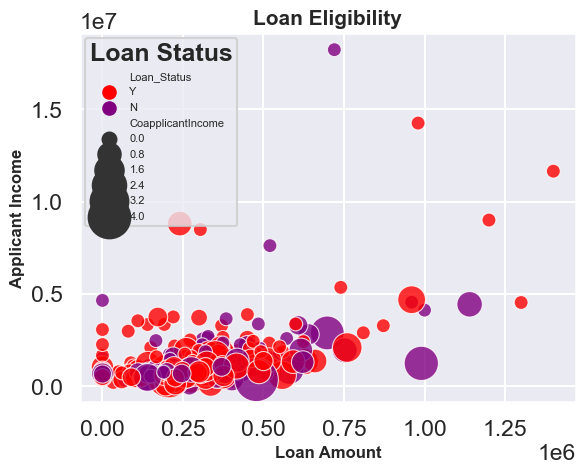

<Figure size 1000x600 with 0 Axes>

In [52]:
bubble_plot(data = Data, colors=['red', 'purple'], figsize=(10, 6))

<span style="font-family: Arial; color: #1f608d; font-size: 36px;">🔍 Insights:Bubble Plot for Loan Eligibility</span>

1. The above bubble plot shows the relationship between Loan Amount, Credit History, and Loan Status. The bubbles in the plot represent the data points, and the size of the bubbles indicates the frequency of the data points.

In [53]:
# parallel coordinates plot
import plotly.express as px

def plot_parallel_coordinates(data, color_col, dimensions, title, legend_title, width=1000, height=500):
    """
    Plots a parallel coordinates plot using Plotly.

    Args:
        data (pandas.DataFrame): The data to plot.
        color_col (str): The column in the data to use as the color scale.
        dimensions (list): A list of column names to use as the dimensions of the plot.
        title (str): The title of the plot.
        legend_title (str): The title of the legend.
        width (int): The width of the plot in pixels. Default is 1000.
        height (int): The height of the plot in pixels. Default is 500.

    Returns:
        A Plotly figure object.

    """
    fig = px.parallel_coordinates(data, color=color_col, dimensions=dimensions)

    # Update figure layout
    fig.update_layout(
        title=title,
        title_font_size=15,
        xaxis_title="Attributes",
        yaxis_title="Values",
        font=dict(size=12, color="black"),
        legend_title=legend_title,
        legend_font_size=12,
        legend_traceorder="reversed",
        width=width,
        height=height
    )

    return fig

In [76]:
# Filter out non-numeric columns
numeric_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

fig =  plot_parallel_coordinates(data = Data , color_col = "LoanAmount", dimensions = numeric_cols, title = "Loan Eligibility", legend_title = "Loan Status", width=1000, height=500)
fig.show()

<span style="font-family: Arial; color: #1f608d; font-size: 36px;">🔍 Insights:Parallel Cordinates Plot for Loan Eligibility</span>

1. Loan Amount and Credit History seem to be the most important variables that determine loan eligibility. Applicants with higher loan amounts and a credit history of 1 are more likely to be eligible for a loan.

In [55]:
# Create a 3D scatter plot
def create_3d_scatterplot(data, x_col, y_col, z_col, color_col=None):
    """
    Creates a 3D scatter plot using Plotly.
    
    Args:
    - data: pandas DataFrame containing the data to be plotted
    - x_col: str, name of the column to be used as the x-axis
    - y_col: str, name of the column to be used as the y-axis
    - z_col: str, name of the column to be used as the z-axis
    - color_col: str (optional), name of the column to be used as the color variable
    
    Returns:
    - fig: Plotly Figure object representing the 3D scatter plot
    """
    
    fig = px.scatter_3d(data, x=x_col, y=y_col, z=z_col, color=color_col)
    
    fig.update_layout(
        scene=dict(
            xaxis_title=x_col,
            yaxis_title=y_col,
            zaxis_title=z_col,
            xaxis_tickfont_size=10,
            yaxis_tickfont_size=10,
            zaxis_tickfont_size=10,
            xaxis_tickangle=-45,
        ),
        margin=dict(l=0, r=0, b=0, t=0)
    )
    
    return fig

In [56]:
fig = create_3d_scatterplot(data = Data, x_col='ApplicantIncome', y_col='CoapplicantIncome', z_col='LoanAmount', color_col='Loan_Status')

# Show the plot
fig.show()

<span style="font-family: Arial; color: #1f608d; font-size: 36px;">🔍 Insights: 3d Scatter Plot</span>

The loan amount is positively correlated with the applicant income. As the income increases, the loan amount also increases.

In [57]:
# Correlation plot
def plot_correlation_heatmap(corr_type, data, palette='coolwarm'):
    """
    Plots a correlation heatmap for the specified type of correlation coefficient and data using the given color palette.

    Parameters:
    corr_type (str): The type of correlation coefficient to be used ('pearson', 'spearman', or 'kendall').
    data (pandas.DataFrame): The data to be used for correlation.
    palette (str): The color palette to be used for the plot. Default is 'coolwarm'.

    Returns:
    None.
    """
    # create correlation matrix
    if corr_type == "pearson":
        corr = data.corr(method = "pearson")
    elif corr_type == "spearman":
        corr = data.corr(method = "spearman")
    elif corr_type == "kendall":
        corr = data.corr(method = "kendall")
    else:
        print("Invalid correlation type. Please choose from 'pearson', 'spearman', or 'kendall'.")
        return 
    
    # set up heatmap plot
    fig, ax = plt.subplots(figsize = (10,8))
    sns.heatmap(corr, cmap = palette , annot = True, vmin = -1, vmax = 1, center = 0)
    
    # set plot title and axis labels
    ax.set_title (f'{corr_type.capitalize()} Correlation Heatmap')
    plt.xticks(rotation = 45)

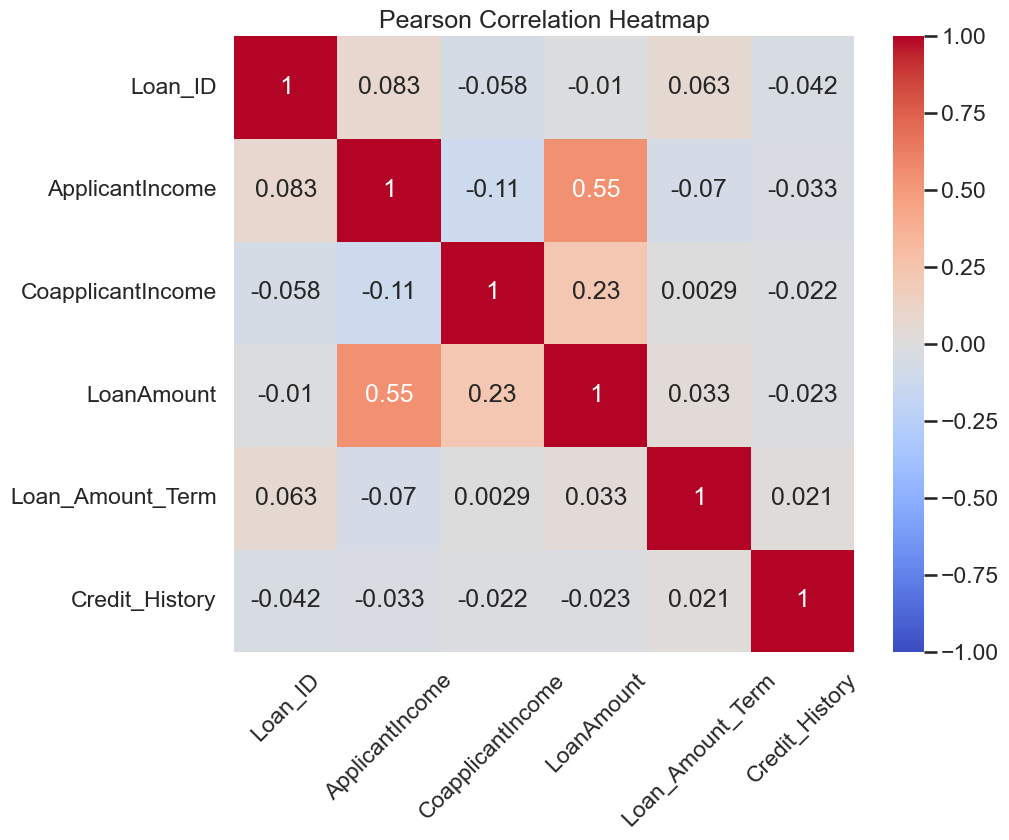

In [58]:
# pearson corrleation heatmap
plot_correlation_heatmap(corr_type = "pearson", data = Data)

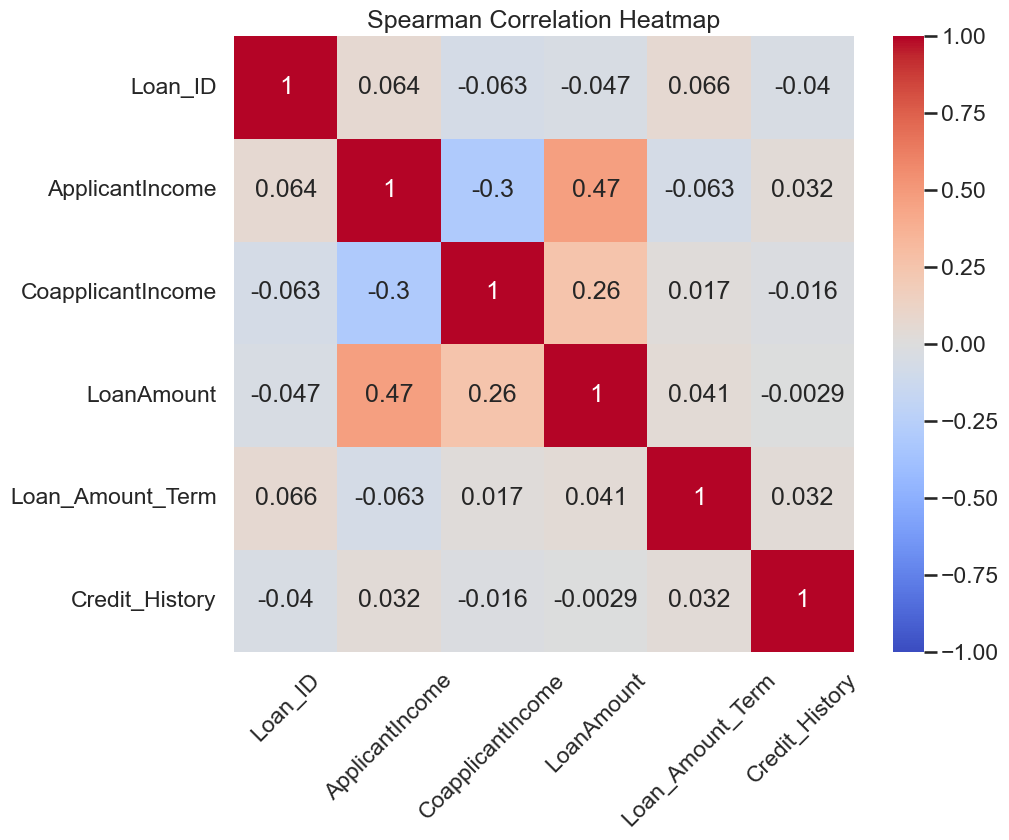

In [59]:
# spearman corrleation heatmap
plot_correlation_heatmap(corr_type = "spearman", data = Data)

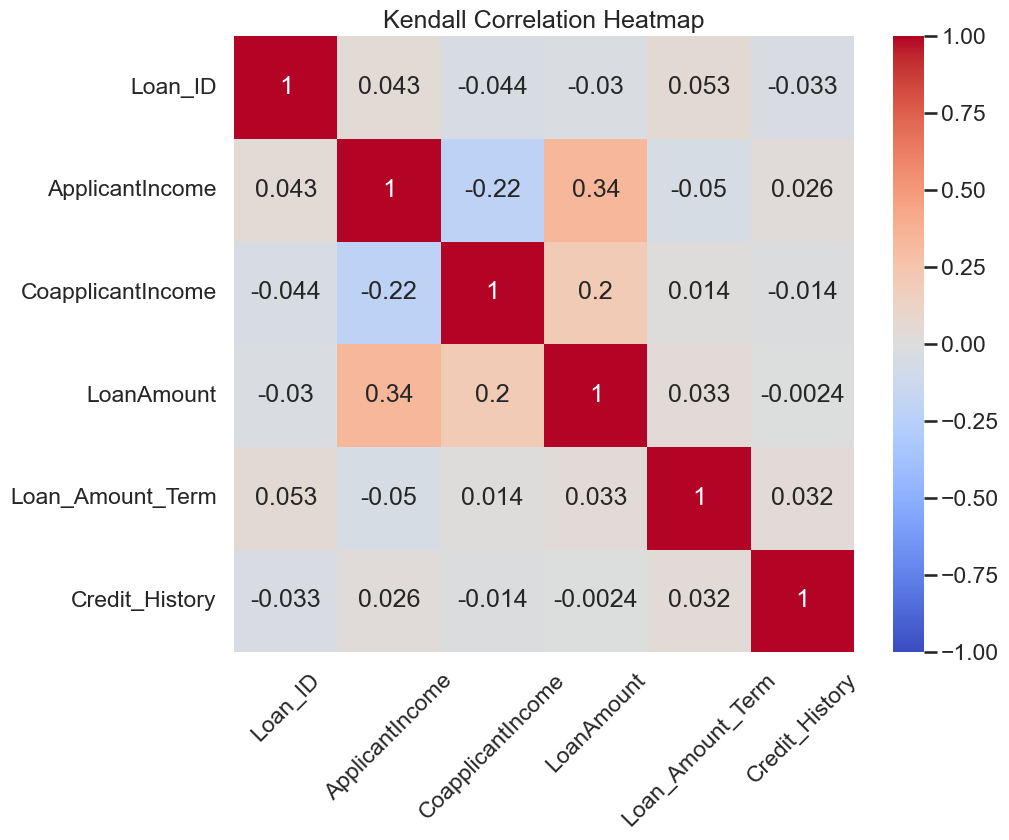

In [60]:
# kendall corrleation heatmap
plot_correlation_heatmap(corr_type = "kendall", data = Data)

<span style="font-family: Arial; color: #1f608d; font-size: 36px;">🔍 Insights: HeatMap</span>

From All above Heat map following insight we can get :

1. Loan Amount and Applicant Income is highly Positive correlated.
2. Loan Amount and coApplicant Income is also highly Positive correlated.
3. Applicant Income and coapplicant Income is negatively correlated.

In [61]:
def scatter_plot_matrix(data, hue = None, diag_kind = "hist", palette = "hus1"):
    """
    Creates a scatter plot matrix of the input data using Seaborn library.

    Parameters:
    data (pandas.DataFrame): The data to be used for the scatter plot matrix.
    hue (str): Column name in the data to specify a grouping variable for color.
    diag_kind (str): Type of plot for diagonal subplots. Options are 'hist' (default), 'kde', or None.
    palette (str): Color palette for the plot. Default is 'husl'.

    Returns:
    None.
    """
    sns.pairplot(data,hue = hue, diag_kind = diag_kind , palette = palette)

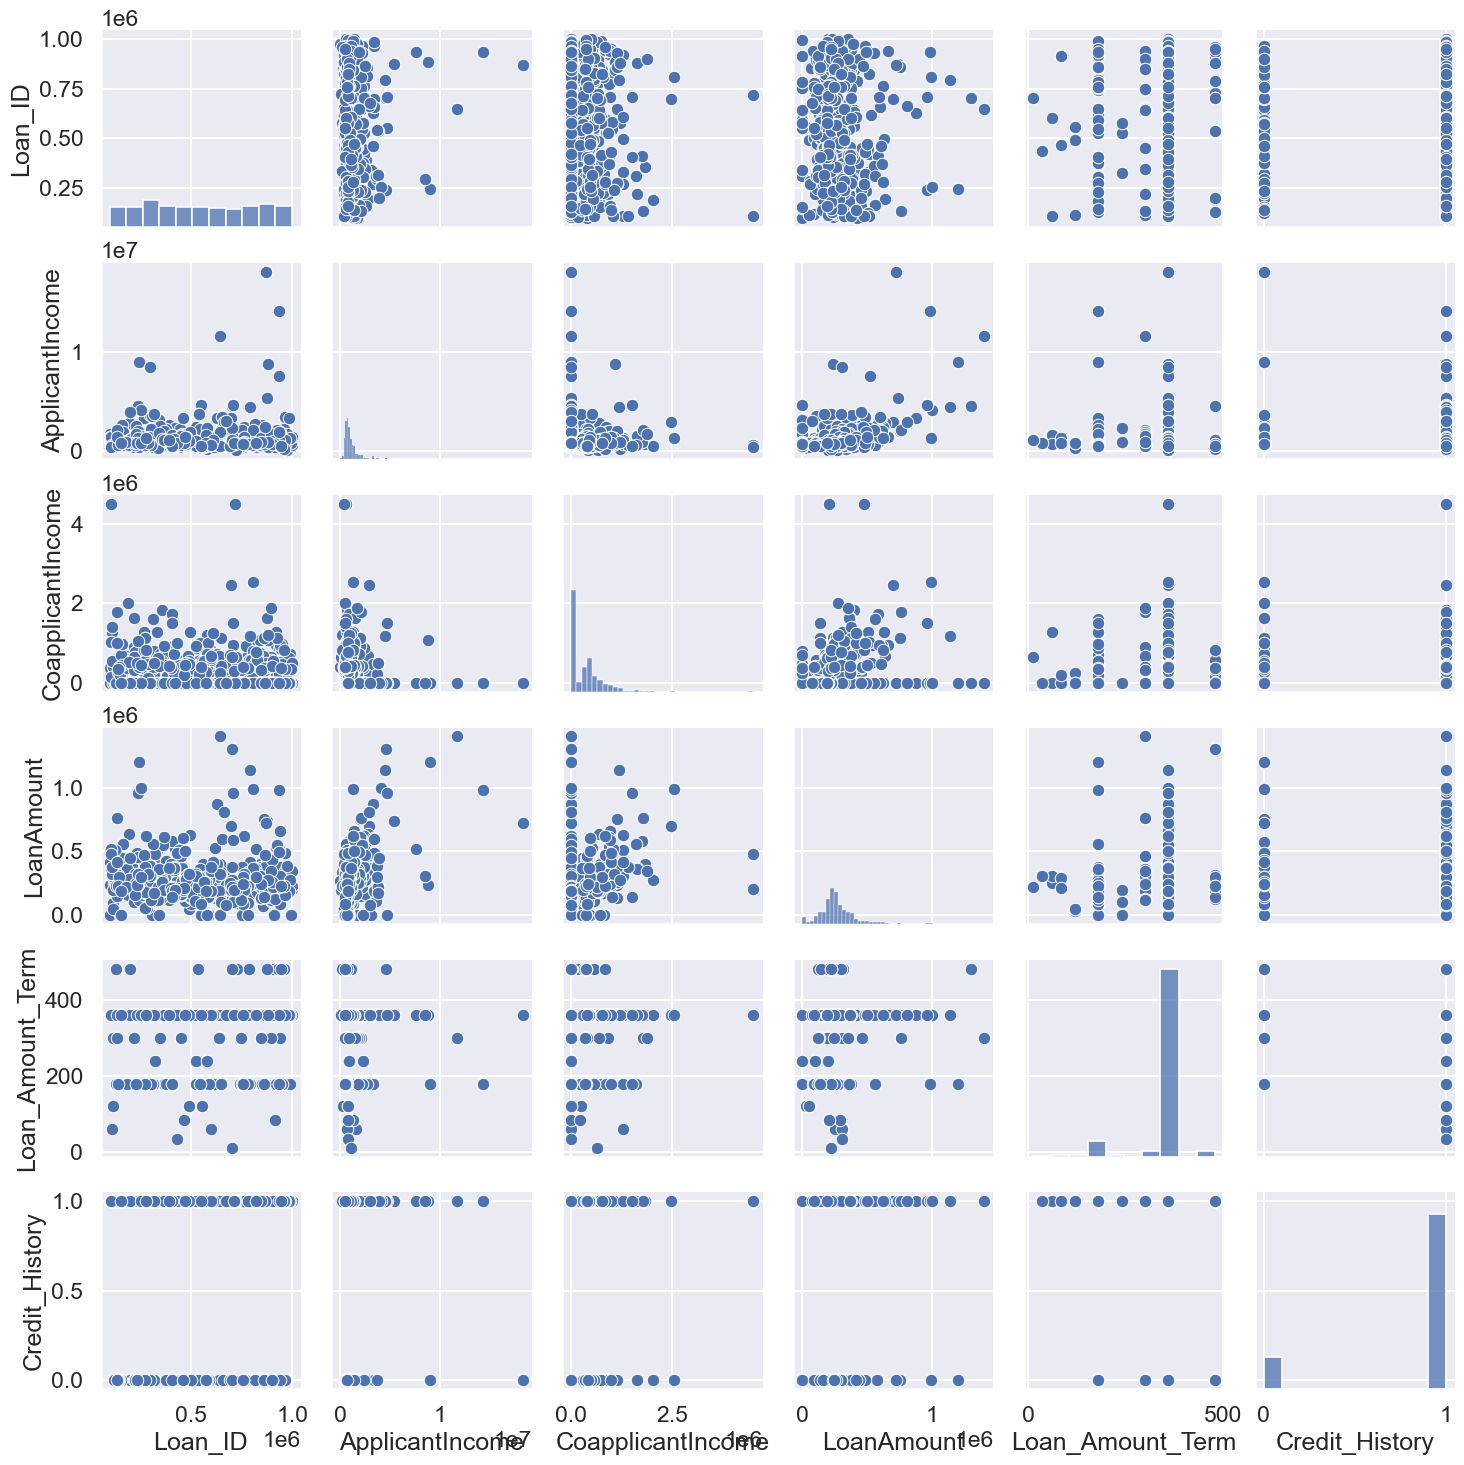

In [62]:
scatter_plot_matrix(data = Data, hue = None, diag_kind = "hist", palette = "hus1")

In [63]:
# Define function to create radar chart
from math import pi
def create_radar_chart(df, title):
    # Calculate number of variables
    num_vars = len(df.columns)
    
    # Create angles for each variable
    angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
    angles += angles[:1]
    
    # Create subplot
    ax = plt.subplot(111, polar=True)
    
    # Set maximum value for radial axis
    ax.set_rmax(max(df.values.flatten()))
    
    # Plot each loan status as a separate line
    for i, row in enumerate(df.iterrows()):
        values = row[1].tolist()
        values += values[:1]
        ax.plot(angles, values, linewidth=1, linestyle='solid', label=row[0])
        ax.fill(angles, values, alpha=0.1)
    
    # Set legend and title
    ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    plt.title(title, fontsize=16)
    
    # Show plot
    plt.show()

In [64]:
# Select variables of interest
vars_of_interest = ['Married', 'Dependents', 'Education', 'Self_Employed', 
                    'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 
                    'Loan_Amount_Term', 'Credit_History', 'Property_Area']

# Calculate mean values for each variable, by loan status
means = Data.groupby('Loan_Status')[vars_of_interest].mean()

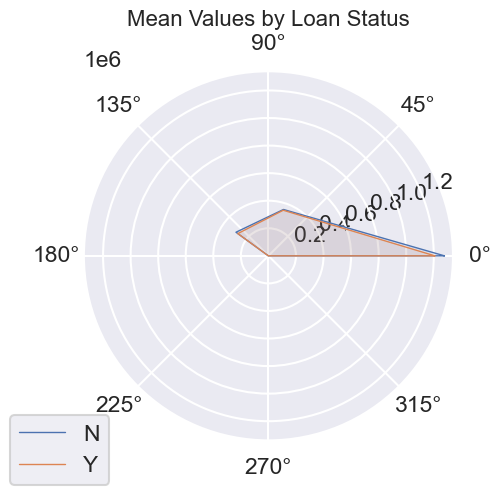

In [65]:
# Create radar chart
create_radar_chart(means, 'Mean Values by Loan Status')

<span style="font-family: Arial; color: #1f608d; font-size: 36px;">🔍 Insights: Radar Chart</span>

chart shows the mean values for each variable, by loan status, on a circular axis with each variable represented as a spoke. The lines connecting the data points represent the overall pattern for each loan status. This can be useful for comparing the relative importance or performance of different variables in predicting loan approval.

In [66]:
import pandas as pd
import squarify
import matplotlib.pyplot as plt


def create_treemap(df, group_col, title):
    """
    Create a treemap from a pandas dataframe.

    Parameters:
    -----------
    df : pandas DataFrame
        The input dataframe.
    group_col : str
        The name of the column to group by.
    size_col : str
        The name of the column to use for sizing the treemap squares.
    title : str
        The title of the treemap.

    Returns:
    --------
    None
    """

    # Group the data by group_col and calculate the size
    grouped = df.groupby([group_col,"Loan_Status"]).size().reset_index(name="count")

    # Define the treemap layout and colors
    squarify.plot(sizes=grouped["count"], label=grouped[group_col] + "\n" + grouped["Loan_Status"] ,
                  alpha=.8, color=["#FFC857", "#E9724C", "#C5283D", "#1B1B1E", "#C5283D", "#E9724C", "#FFC857"])

    # Add a title and axis labels
    plt.title(title)
    plt.axis("off")

    # Show the treemap
    plt.show()

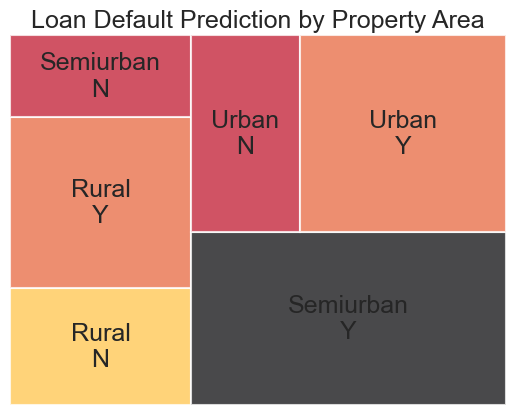

In [67]:
# treap Map for Loan Default Prediction by property area
title = "Loan Default Prediction by Property Area"
create_treemap(df = Data, group_col = "Property_Area" , title = title)

<span style="font-family: Arial; color: #1f608d; font-size: 36px;">🔍 Insights: TreeMap Chart</span>

Follwing Insight we can get from following chart :

1. We can see that Semi Urabn Applicant are most whose loan approved.
2. After second it is Urban applicant on most approved loan applicant.
3. Rural applicant are lowest in approved loan applicant count.
4. Semi Urabn area applicant application rejected least times , where as Rural are higher contributing towards rejected loan application

In [68]:
def sunbrust_chart(data, column , figsize = (10,6)):
    """
    
    
    
    
    """
    # Create new column combining loan status and property area
    data["Status_Area"] = data["Loan_Status"]+ "_" + data[column]
    
    # Count number of loans in each category and convert to DataFrame
    df_counts = pd.DataFrame(data["Status_Area"].value_counts())
    
    # Reset index and rename columns
    df_counts = df_counts.reset_index()
    df_counts.columns = ["id", "value"]

    # Add labels for each category
    df_counts["parent"] = df_counts["id"].apply(lambda x: x.split("_")[0])
    df_counts.loc[df_counts["parent"] == "Y", "parent"] = "Loan Approved"
    df_counts.loc[df_counts["parent"] == "N", "parent"] = "Loan Denied"

    # Create sunburst chart
    fig = px.sunburst(df_counts, path=["parent", "id"], values="value")

    # Display chart
    fig.show()

In [69]:
sunbrust_chart(data = Data, column = "Property_Area" , figsize = (10,6))

<span style="font-family: Arial; color: #1f608d; font-size: 36px;">🔍 Insights: Sunbrust Chart</span>

A sunburst chart is a type of data visualization that displays hierarchical data as a series of concentric rings. Each ring represents a level in the hierarchy, with the outermost ring representing the root level and the inner rings representing sub-levels. The rings are divided into segments, with the size of each segment proportional to the value being represented.

1. From above Graph we can get Hierarchical relation between Loan approval Status and Property Are like Urban , Rural and Semi Urban.
2. Red inner circle represent Loan Denied status and  outer part represent property area represent like each seperate area for urban ,rural and semiurban.
3. Same Blue area represent inside circle Loan approval status  and outer part represent property area ( each outer seperate area for urban , rural  and semiurban

In [70]:
def plot_loan_eligibility_area(data, figsize = (10,6)):
    """
    Plots an area chart to show the proportion of approved loans for each combination of credit history and education level.

    Args:
        data (pd.DataFrame): A pandas DataFrame containing the loan eligibility data.
        figsize (tuple, optional): A tuple specifying the figure size. Default is (10,6).

    Returns:
        None.
    """    
    # calculating the proportion of approved loans for each category
    approved = data[data["Loan_Status"] == "Y"].groupby(["Credit_History","Education"]).size()
    
    total = data.groupby(["Credit_History", "Education"]).size()
    proportions = approved / total
    
    # Reshape the proportions dataframe for plotting
    proportions = proportions.unstack()
    proportions.fillna(0, inplace = True)
    proportions = proportions[["Graduate", "Not Graduate"]]
    proportions.columns = ['Higher Education', 'Lower Education']
    
    #crete the area plot
    ax = proportions.plot(kind = "area", stacked = True, figsize = (10,6), alpha = 0.7)
    
    # show the plot
    plt.show()

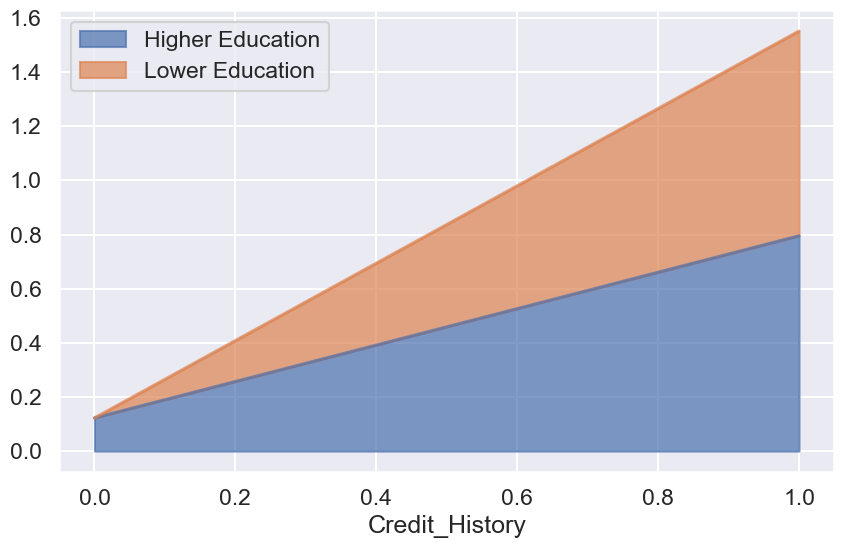

In [71]:
plot_loan_eligibility_area(data = Data, figsize = (10,6))

<span style="font-family: Arial; color: #1f608d; font-size: 36px;">🔍 Insights: Area Chart</span>

From Above Plot we will get following insight :

1. This Plot give relationship between credit history , education level and loan eligibility.

2. This plot show the proportion of approved loans for each combination of credit history and education level.

3. Plot has two stacked area . one blue area is for Higher educated applicant and other area is for lower educated applicant.

In [72]:
import matplotlib.pyplot as plt

def hexabin_plot(data, feature1, feature2, cmap="Blues", gridsize=20):
    plt.hexbin(data[feature1], data[feature2], gridsize=gridsize, cmap=cmap)
    plt.title("ApplicantIncome vs LoanAmount hexbin Plot")
    plt.xlabel("ApplicantIncome")
    plt.ylabel("LoanAmount")
    plt.colorbar().set_label("Density")
    plt.xlim((0,3000000))
    plt.ylim((0,800000))

    plt.show()

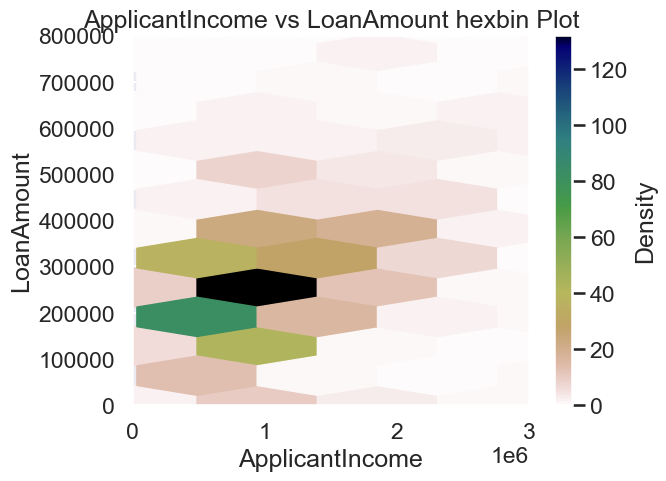

In [73]:
hexabin_plot(data = Data , feature1 = "ApplicantIncome"  , feature2 = "LoanAmount", cmap = "gist_earth_r",gridsize=20)

<span style="font-family: Arial; color: #1f608d; font-size: 36px;">🔍 Insights: Hexbin Plot</span>

From Above Plot we will get following insight :

1. Hexbin plot is a type of two dimensiona; histogram that used to visualize the density of points in a scatter plot.

2. From hexbin plot  we see that at middle density are more than tail or at start.. 
3. At extreme point density are low meaning very few data points are there.

In [74]:
import pandas as pd
import matplotlib.pyplot as plt


def waterfall_chart(data ,figsize=(14,12)):
    # Calculate initial probability of loan eligibility
    initial_prob = Data["Loan_Status"].value_counts(normalize=True)["Y"]

    # Calculate probabilities for each factor
    married_prob = Data.groupby("Married")["Loan_Status"].value_counts(normalize=True).unstack()["Y"]["Yes"]
    dependents_prob = Data.groupby("Dependents")["Loan_Status"].value_counts(normalize=True).unstack()["Y"][0]
    education_prob = Data.groupby("Education")["Loan_Status"].value_counts(normalize=True).unstack()["Y"]["Graduate"]
    self_employed_prob = Data.groupby("Self_Employed")["Loan_Status"].value_counts(normalize=True).unstack()["Y"]["Yes"]
    credit_history_prob = Data.groupby("Credit_History")["Loan_Status"].value_counts(normalize=True).unstack()["Y"][1]

    # Calculate changes in probability due to each factor
    married_change = married_prob - initial_prob
    dependents_change = dependents_prob - initial_prob
    education_change = education_prob - initial_prob
    self_employed_change = self_employed_prob - initial_prob
    credit_history_change = credit_history_prob - initial_prob

    # Create waterfall chart
    fig, ax = plt.subplots(figsize=(14,12))

    ax.bar("Initial", initial_prob, color="gray")
    ax.bar("Married", married_change, bottom=initial_prob, color="orange")
    ax.bar("Dependents", dependents_change, bottom=married_prob, color="blue")
    ax.bar("Education", education_change, bottom=dependents_prob, color="green")
    ax.bar("Self Employed", self_employed_change, bottom=education_prob, color="red")
    ax.bar("Credit History", credit_history_change, bottom=self_employed_prob, color="purple")

    ax.axhline(y=0, color="gray", linewidth=0.5, linestyle="--")

    ax.set_title("Waterfall Chart for Loan Eligibility Prediction")
    ax.set_xlabel("Factors")
    ax.set_ylabel("Change in Probability")

    plt.show()

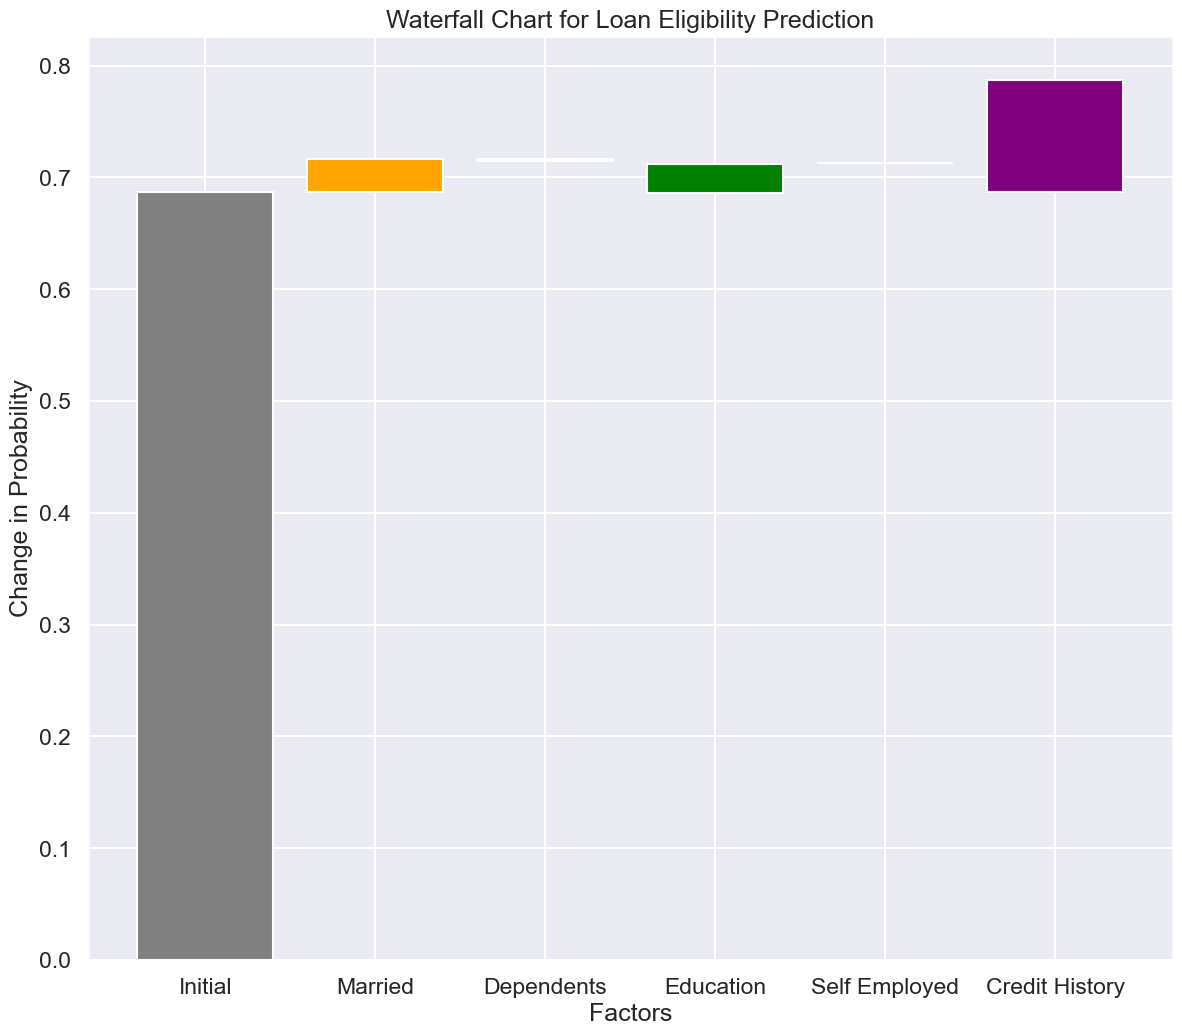

In [75]:
waterfall_chart(data = Data ,figsize=(14,12))

<span style="font-family: Arial; color: #1f608d; font-size: 36px;">🔍 Insights: Waterfall Chart</span>

From Above Plot we will get following insight :
    
1. From Above Plot we will get following insight :
2. Above Plot Give visual representation of the cumulative effect of other features/
3. It is used to show how initial value is affected by a series of other features positive or negative values, result in final value.
4. credit history and Martial status is affected positive on initial value.